<a href="https://colab.research.google.com/github/rajchoksi1997/CMPE257-Project/blob/main/Main_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

## Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataSet = pd.read_csv('/content/drive/MyDrive/timeseries.csv.zip')

In [ ]:
print("First 5 Rows\n")
dataSet.head()

First 5 Rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,...,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,...,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,...,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,...,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,...,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


In [ ]:
print("Last five rows\n")
dataSet.tail()

Last five rows



,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
19300675,56043,2016-12-27,0.16,82.88,1.63,-7.97,-13.49,-12.81,-1.39,-13.60,...,-9.41,5.90,7.63,3.61,4.02,8.58,10.39,5.92,4.47,0.0
19300676,56043,2016-12-28,0.02,83.33,1.41,-8.71,-14.10,-13.84,-2.49,-13.56,...,-10.55,6.50,11.43,4.11,7.32,9.92,14.49,7.26,7.22,NaN
19300677,56043,2016-12-29,0.00,83.75,1.59,-7.96,-13.30,-13.03,0.42,-14.51,...,-10.29,4.29,6.24,2.03,4.22,6.56,10.07,3.20,6.87,NaN
19300678,56043,2016-12-30,1.22,82.49,2.63,-2.94,-7.40,-7.33,3.76,-6.86,...,-4.14,4.98,7.34,1.99,5.35,7.28,10.12,3.24,6.89,NaN
19300679,56043,2016-12-31,0.44,82.19,1.75,-7.56,-11.98,-11.82,-0.95,-11.61,...,-10.17,2.31,3.47,0.41,3.06,3.37,5.26,0.66,4.60,NaN


In [ ]:
print("Data Show Describe")
dataSet.describe()

Data Show Describe


,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,1.930068e+07,2.756796e+06
mean,3.067038e+04,2.644145e+00,9.665578e+01,7.816178e+00,1.280146e+01,6.951072e+00,6.986916e+00,1.868141e+01,7.411665e+00,1.126974e+01,1.288900e+01,3.564013e+00,5.195993e+00,1.928879e+00,3.267113e+00,5.525151e+00,7.811798e+00,3.130077e+00,4.681721e+00,8.245298e-01
std,1.497911e+04,6.226305e+00,5.447994e+00,4.694305e+00,1.092674e+01,1.014551e+01,1.009116e+01,1.154487e+01,1.057680e+01,4.005165e+00,1.114961e+01,1.862297e+00,2.627969e+00,1.351713e+00,1.947028e+00,2.321549e+00,2.861210e+00,2.122751e+00,2.171263e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.612000e+01,1.200000e-01,-3.734000e+01,-3.770000e+01,-3.746000e+01,-3.220000e+01,-4.596000e+01,3.000000e-02,-3.823000e+01,2.500000e-01,5.400000e-01,0.000000e+00,1.600000e-01,4.000000e-01,7.000000e-01,0.000000e+00,3.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.584000e+01,3.780000e+00,4.450000e+00,-9.600000e-01,-9.200000e-01,1.027000e+01,-7.000000e-01,8.420000e+00,4.340000e+00,2.140000e+00,3.110000e+00,9.600000e-01,1.810000e+00,3.790000e+00,5.680000e+00,1.450000e+00,3.130000e+00,0.000000e+00
50%,2.921200e+04,1.800000e-01,9.830000e+01,6.840000e+00,1.402000e+01,7.570000e+00,7.580000e+00,2.040000e+01,8.030000e+00,1.124000e+01,1.404000e+01,3.140000e+00,4.670000e+00,1.660000e+00,2.800000e+00,5.120000e+00,7.310000e+00,2.770000e+00,4.250000e+00,0.000000e+00
75%,4.600750e+04,2.160000e+00,9.996000e+01,1.135000e+01,2.188000e+01,1.552000e+01,1.552000e+01,2.787000e+01,1.614000e+01,1.408000e+01,2.207000e+01,4.600000e+00,6.750000e+00,2.580000e+00,4.250000e+00,6.880000e+00,9.460000e+00,4.410000e+00,5.770000e+00,1.189600e+00
max,5.604300e+04,2.345900e+02,1.043200e+02,2.292000e+01,4.139000e+01,2.755000e+01,2.755000e+01,4.991000e+01,3.380000e+01,3.461000e+01,4.385000e+01,2.369000e+01,3.628000e+01,1.720000e+01,2.825000e+01,2.835000e+01,4.273000e+01,2.087000e+01,3.243000e+01,5.000000e+00


In [ ]:
print("Datatype of Attributes\n")
dataSet.info()

Datatype of Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300680 entries, 0 to 19300679
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 3.0+ GB


In [ ]:
print("Data Show Columns:\n")
dataSet.columns

Data Show Columns:



Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

In [ ]:
print("Data Show Shape")
dataSet.shape

Data Show Shape


(19300680, 21)

In [ ]:
print("Sum of null values")
dataSet.isnull().sum()

Sum of null values


fips                  0
date                  0
PRECTOT               0
PS                    0
QV2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
T2M_RANGE             0
TS                    0
WS10M                 0
WS10M_MAX             0
WS10M_MIN             0
WS10M_RANGE           0
WS50M                 0
WS50M_MAX             0
WS50M_MIN             0
WS50M_RANGE           0
score          16543884
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



True

In [ ]:
# Drop missing values in target variable
dataSet = dataSet.dropna()
dataSet.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
print("Null values in the data\n")
dataSet.isnull().values.any()

Null values in the data



False

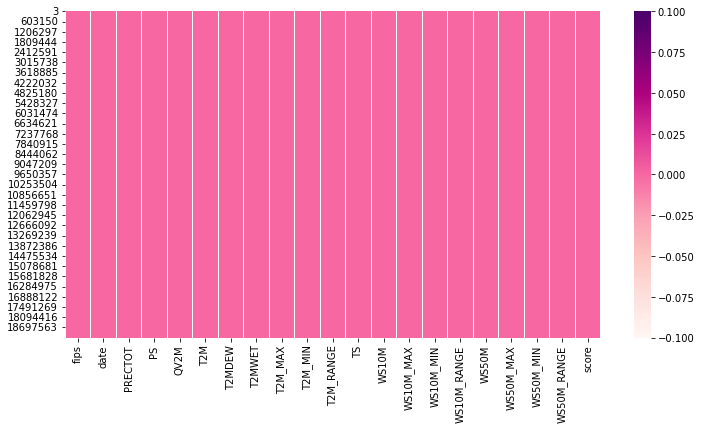

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dataSet.isnull(),cmap='RdPu')
plt.show()

In [ ]:
column_list = list(dataSet.columns)
column_list

['fips',
 'date',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score']

In [ ]:
# Number of unique values in each of the columns.
dataSet.nunique()

fips            3108
date             887
PRECTOT         6737
PS              3636
QV2M            2165
T2M             6606
T2MDEW          5582
T2MWET          5530
T2M_MAX         6905
T2M_MIN         6557
T2M_RANGE       2787
TS              6928
WS10M           1513
WS10M_MAX       1877
WS10M_MIN       1276
WS10M_RANGE     1592
WS50M           1854
WS50M_MAX       2286
WS50M_MIN       1572
WS50M_RANGE     1935
score          55395
dtype: int64

In [ ]:
date = dataSet['date']
date.head()

3     2000-01-04
10    2000-01-11
17    2000-01-18
24    2000-01-25
31    2000-02-01
Name: date, dtype: object

In [ ]:
# Extract year, day and month into new columns
dataSet['year'] = pd.DatetimeIndex(date).year
dataSet['month'] = pd.DatetimeIndex(date).month
dataSet['day'] = pd.DatetimeIndex(date).day
dataSet.dtypes

fips             int64
date            object
PRECTOT        float64
PS             float64
QV2M           float64
T2M            float64
T2MDEW         float64
T2MWET         float64
T2M_MAX        float64
T2M_MIN        float64
T2M_RANGE      float64
TS             float64
WS10M          float64
WS10M_MAX      float64
WS10M_MIN      float64
WS10M_RANGE    float64
WS50M          float64
WS50M_MAX      float64
WS50M_MIN      float64
WS50M_RANGE    float64
score          float64
year             int64
month            int64
day              int64
dtype: object

In [ ]:
dataSet['score'].value_counts()

0.0000    1480827
1.0000     219135
2.0000     123789
3.0000      82801
4.0000      45841
           ...   
0.1145          1
2.0172          1
0.6750          1
1.3998          1
0.6060          1
Name: score, Length: 55395, dtype: int64

In [ ]:
# Binning target variable into 6classes
dataSet['score'] = dataSet['score'].round().astype(int)

In [ ]:
dataSet['score'].value_counts()

0    1652230
1     466944
2     295331
3     196802
4     106265
5      39224
Name: score, dtype: int64

In [ ]:
dataSet.describe(include=['object'])

,date
count,2756796
unique,887
top,2000-01-04
freq,3108


In [ ]:
# Removing special characters from continuous features
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    unique_val_cols = dataSet[c].unique()
    print ('Unique values in ' , c , 'are ', unique_val_cols)

Unique values in  fips are  [ 1001  1003  1005 ... 56039 56041 56043]
Unique values in  date are  ['2000-01-04' '2000-01-11' '2000-01-18' '2000-01-25' '2000-02-01'
 '2000-02-08' '2000-02-15' '2000-02-22' '2000-02-29' '2000-03-07'
 '2000-03-14' '2000-03-21' '2000-03-28' '2000-04-04' '2000-04-11'
 '2000-04-18' '2000-04-25' '2000-05-02' '2000-05-09' '2000-05-16'
 '2000-05-23' '2000-05-30' '2000-06-06' '2000-06-13' '2000-06-20'
 '2000-06-27' '2000-07-04' '2000-07-11' '2000-07-18' '2000-07-25'
 '2000-08-01' '2000-08-08' '2000-08-15' '2000-08-22' '2000-08-29'
 '2000-09-05' '2000-09-12' '2000-09-19' '2000-09-26' '2000-10-03'
 '2000-10-10' '2000-10-17' '2000-10-24' '2000-10-31' '2000-11-07'
 '2000-11-14' '2000-11-21' '2000-11-28' '2000-12-05' '2000-12-12'
 '2000-12-19' '2000-12-26' '2001-01-02' '2001-01-09' '2001-01-16'
 '2001-01-23' '2001-01-30' '2001-02-06' '2001-02-13' '2001-02-20'
 '2001-02-27' '2001-03-06' '2001-03-13' '2001-03-20' '2001-03-27'
 '2001-04-03' '2001-04-10' '2001-04-17' '200

In [ ]:
for c in ['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score']:
    dataSet[c] = pd.to_numeric(dataSet[c], errors='coerce')

In [ ]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2756796 entries, 3 to 19300675
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         float64
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        int64  
 21  year         int64  
 22  month        int64  
 23  day          int64  
dtypes: float64(19), int64(5)
memory usage: 525.8 MB


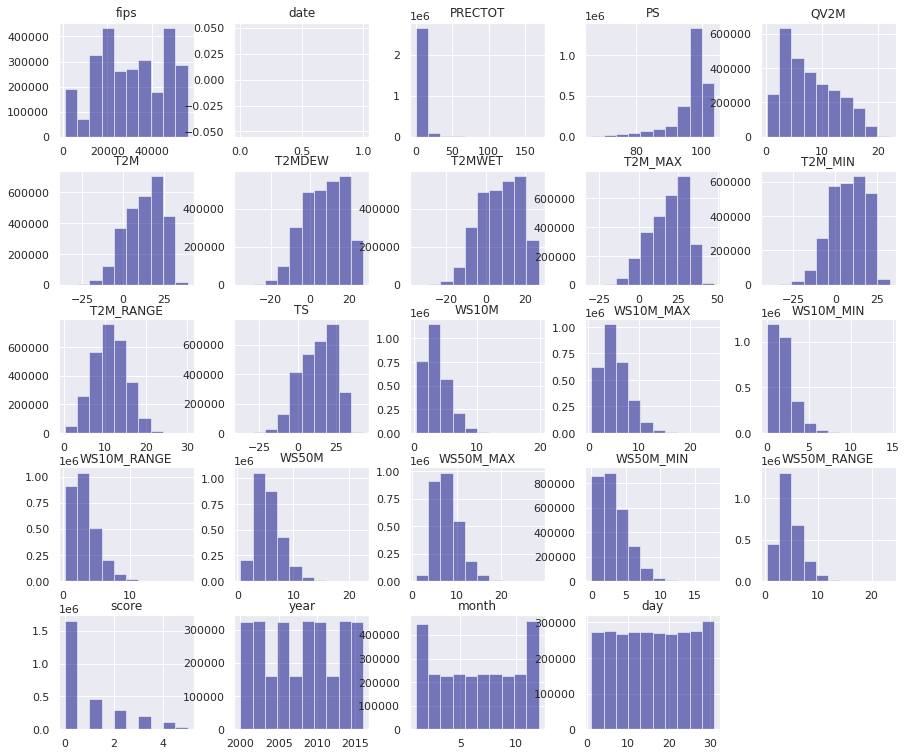

In [ ]:
sns.set(style="darkgrid")
dataSet.hist(bins=10,figsize=(15,13) ,color = 'navy', alpha = 0.5)
plt.show()

## The Drought dataset is a labelled dataset. Distribution of scores is analyzed to identify if data is biased or not.
## It can be seen that the features PRICTOT ,WS10M-MIN,WS50M-MIN,WS10M-RANGE are skewed to the left.
## The features PS,T2M,T2M-MAX are skewed to the right while remaining features are fairly well distributed across all range.

# Exploratory Data Analysis

## Univariate Analysis on Descriptive Statistics

In [ ]:
# For numeric 
dataSet.describe()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,...,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,day
count,2.756796e+06,0.0,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,...,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,NaN,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,...,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.231266e-01,2.007999e+03,6.520857e+00,1.568997e+01
std,1.497911e+04,NaN,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,...,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.239070e+00,4.897714e+00,3.447033e+00,8.798878e+00
min,1.001000e+03,NaN,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,...,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00,2.000000e+03,1.000000e+00,1.000000e+00
25%,1.904450e+04,NaN,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,...,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.921200e+04,NaN,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,...,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00,2.008000e+03,7.000000e+00,1.600000e+01
75%,4.600750e+04,NaN,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,...,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.000000e+00,2.012000e+03,1.000000e+01,2.300000e+01
max,5.604300e+04,NaN,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,...,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01


In [ ]:
# For categorical
dataSet[["year","month","day"]].describe()

,year,month,day
count,2.756796e+06,2.756796e+06,2.756796e+06
mean,2.007999e+03,6.520857e+00,1.568997e+01
std,4.897714e+00,3.447033e+00,8.798878e+00
min,2.000000e+03,1.000000e+00,1.000000e+00
25%,2.004000e+03,4.000000e+00,8.000000e+00
50%,2.008000e+03,7.000000e+00,1.600000e+01
75%,2.012000e+03,1.000000e+01,2.300000e+01
max,2.016000e+03,1.200000e+01,3.100000e+01


In [ ]:
print("Skewness")
dataSet.skew(axis = 0, skipna = True)

Skewness


fips          -0.077367
date                NaN
PRECTOT        4.568803
PS            -2.132573
QV2M           0.526605
T2M           -0.426059
T2MDEW        -0.302684
T2MWET        -0.289061
T2M_MAX       -0.467449
T2M_MIN       -0.365648
T2M_RANGE      0.092413
TS            -0.396537
WS10M          1.112524
WS10M_MAX      0.931888
WS10M_MIN      1.400951
WS10M_RANGE    1.287969
WS50M          0.861690
WS50M_MAX      0.899830
WS50M_MIN      0.860444
WS50M_RANGE    1.214403
score          1.498394
year          -0.000183
month         -0.008198
day            0.006969
dtype: float64

In [ ]:
print("Kurtosis")
dataSet.kurtosis(axis = 0, skipna = True)

Kurtosis


fips           -1.100136
date                 NaN
PRECTOT        33.304567
PS              4.813301
QV2M           -0.786067
T2M            -0.554336
T2MDEW         -0.733896
T2MWET         -0.758504
T2M_MAX        -0.508101
T2M_MIN        -0.446940
T2M_RANGE      -0.316984
TS             -0.535722
WS10M           1.419724
WS10M_MAX       0.705953
WS10M_MIN       3.159288
WS10M_RANGE     2.084432
WS50M           0.819908
WS50M_MAX       0.988590
WS50M_MIN       0.596612
WS50M_RANGE     2.205205
score           1.387056
year           -1.208783
month          -1.207511
day            -1.194293
dtype: float64

# Exploratory Data Analysis

## Univariate Analysis on Distribution of continuous variables

In [ ]:
list_of_columns = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE']
measures_df = dataSet[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'score']]

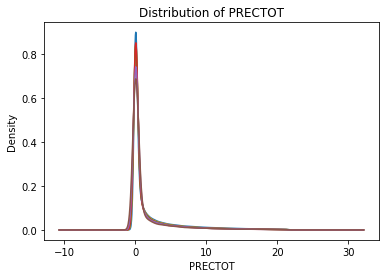

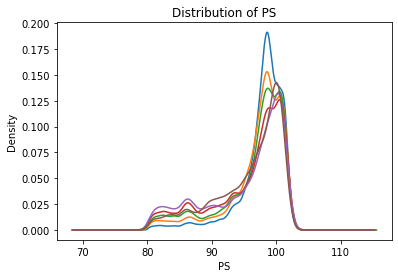

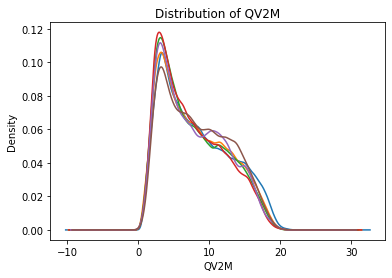

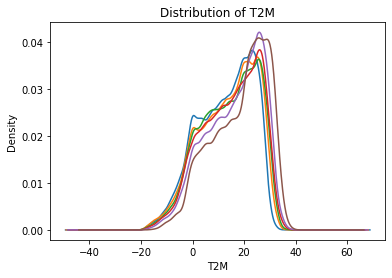

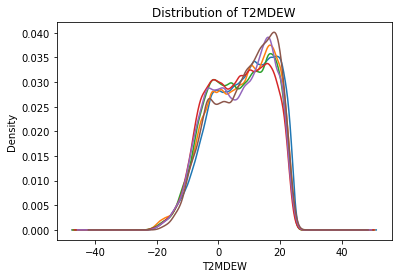

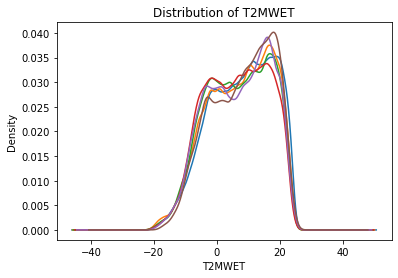

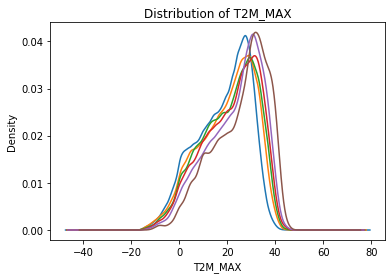

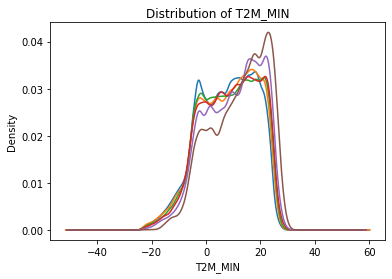

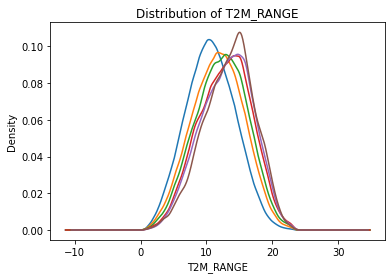

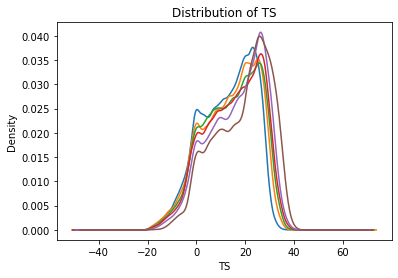

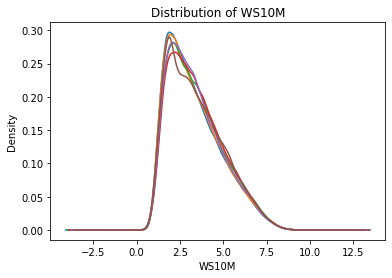

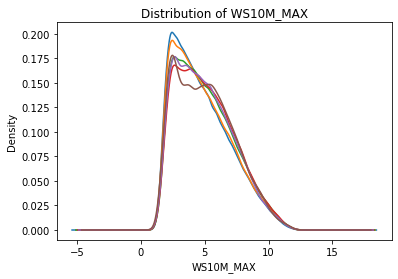

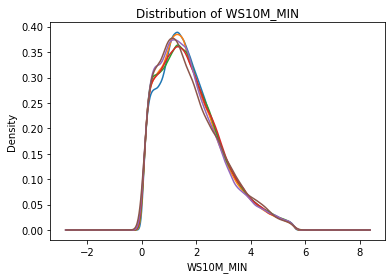

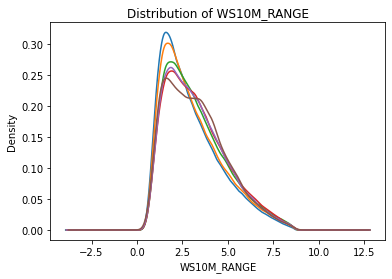

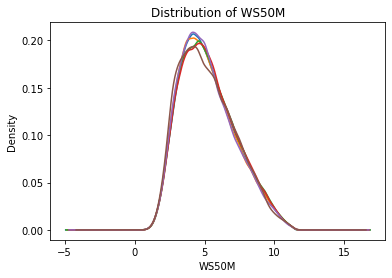

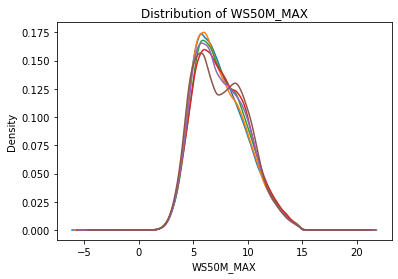

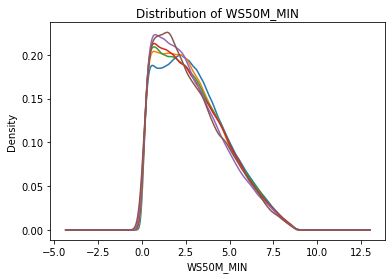

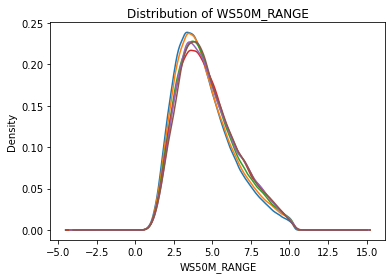

In [ ]:
grp = dataSet.groupby('score')
for col in list_of_columns:
    plt.figure()
    #plt.hist(dataSet[col], density = True)
    grp[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

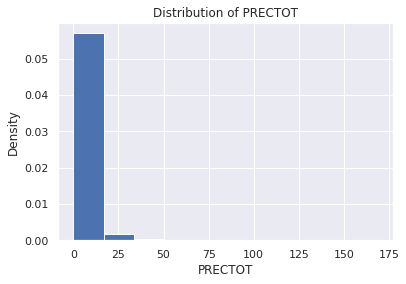

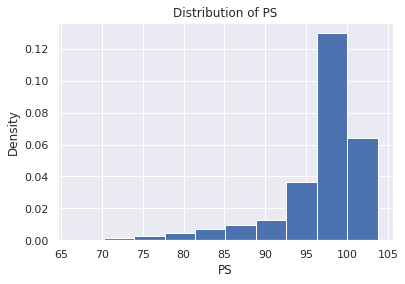

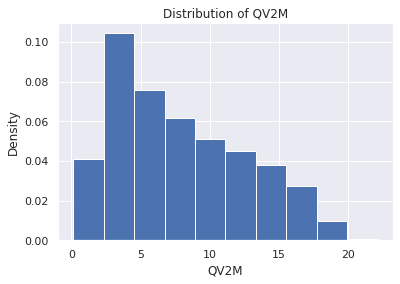

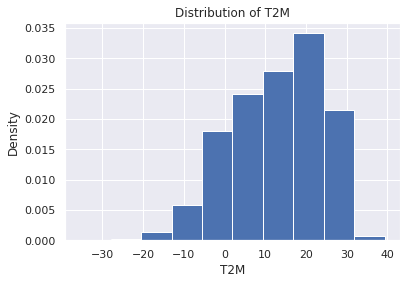

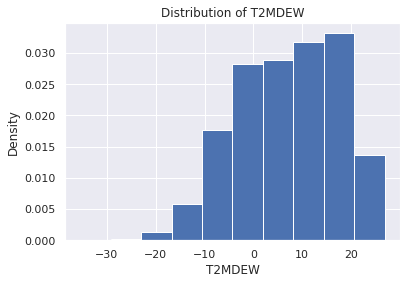

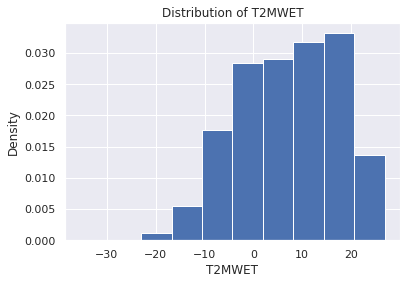

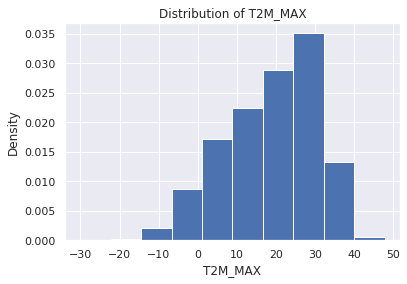

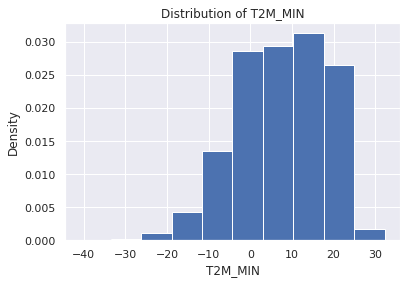

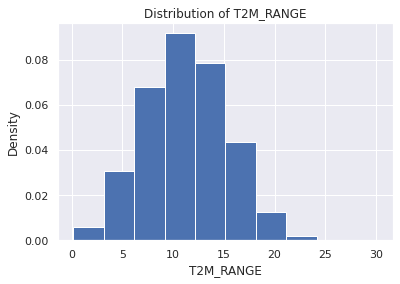

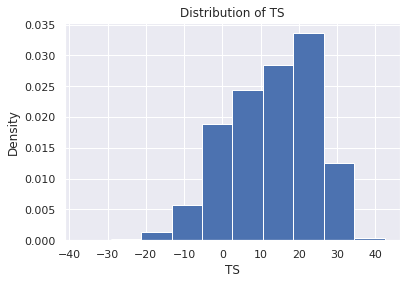

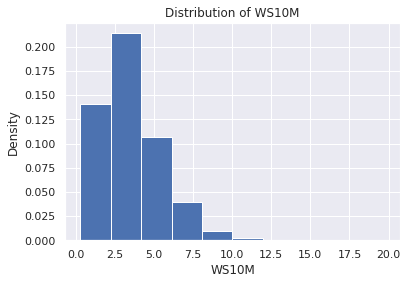

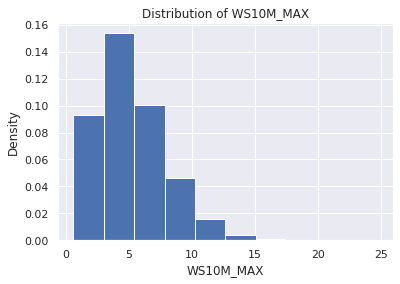

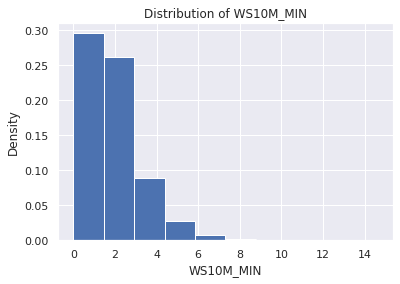

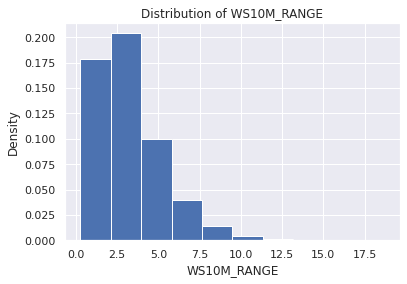

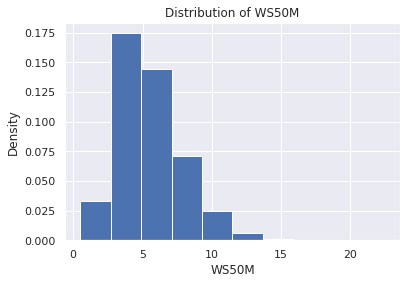

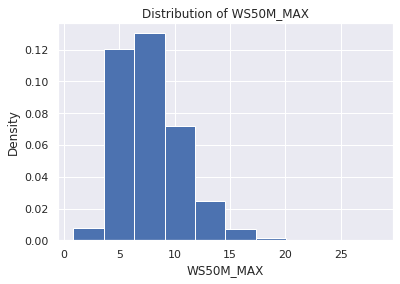

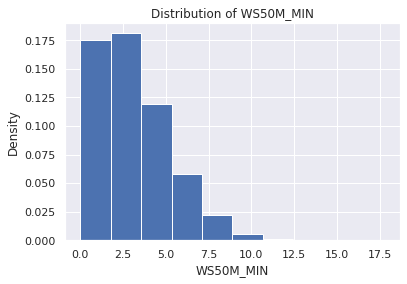

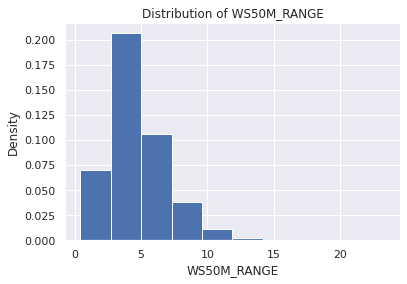

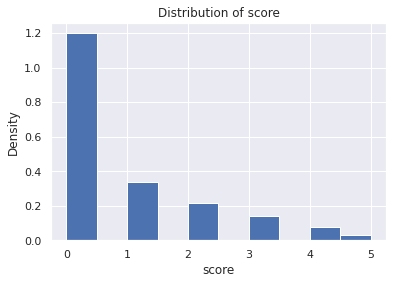

In [ ]:
for col in list_of_columns:
    plt.figure()
    plt.hist(dataSet[col], density = True)
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))


# Identifying the outliers

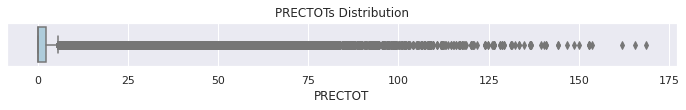

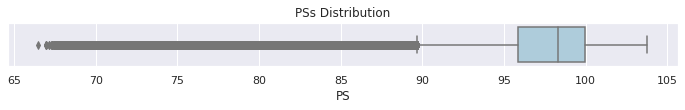

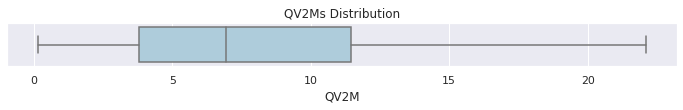

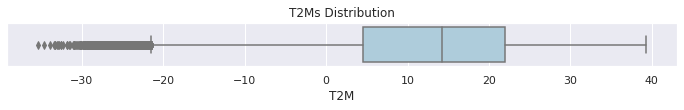

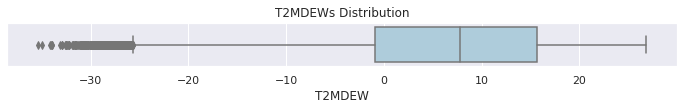

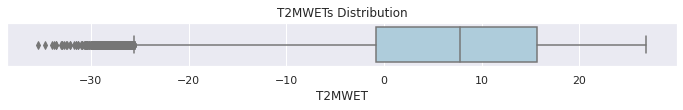

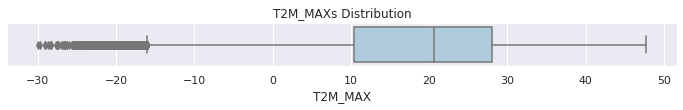

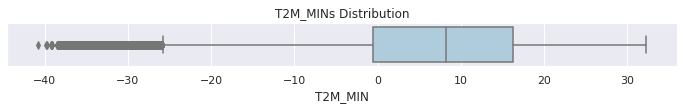

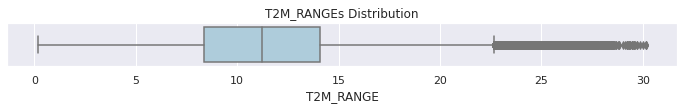

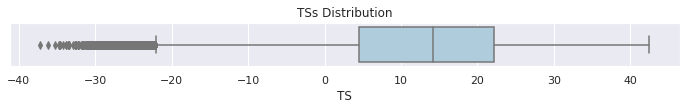

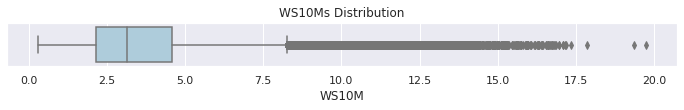

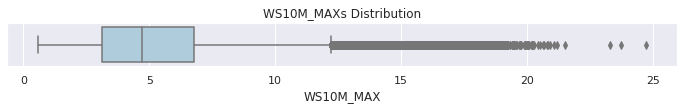

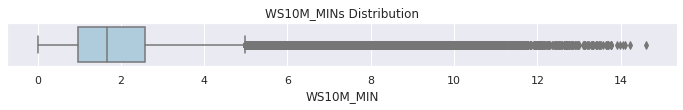

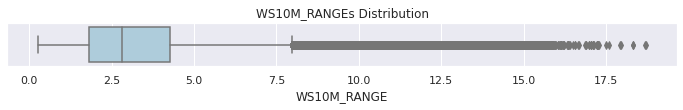

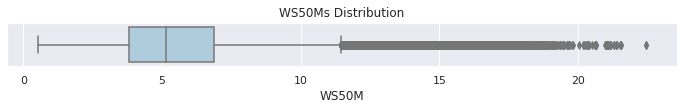

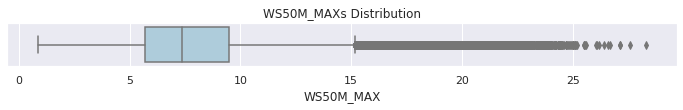

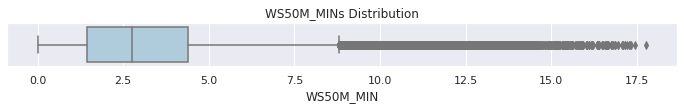

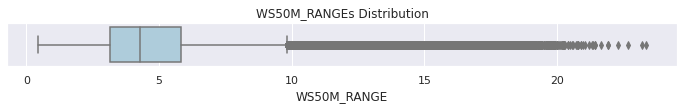

In [ ]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [ ]:
print('Total rows:')
len(measures_df.index)

Total rows:


2756796

In [ ]:
for i in measures_df.select_dtypes(exclude = ['object']).columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  PRECTOT
65933
# of rows beyond range of 3 standard deviations in  PS
73197
# of rows beyond range of 3 standard deviations in  QV2M
1
# of rows beyond range of 3 standard deviations in  T2M
4531
# of rows beyond range of 3 standard deviations in  T2MDEW
2023
# of rows beyond range of 3 standard deviations in  T2MWET
1814
# of rows beyond range of 3 standard deviations in  T2M_MAX
3384
# of rows beyond range of 3 standard deviations in  T2M_MIN
6944
# of rows beyond range of 3 standard deviations in  T2M_RANGE
3628
# of rows beyond range of 3 standard deviations in  TS
4762
# of rows beyond range of 3 standard deviations in  WS10M
29954
# of rows beyond range of 3 standard deviations in  WS10M_MAX
23387
# of rows beyond range of 3 standard deviations in  WS10M_MIN
39901
# of rows beyond range of 3 standard deviations in  WS10M_RANGE
35979
# of rows beyond range of 3 standard deviations in  WS50M
23090
# of rows beyond range of 3 standa

# Deleting the values which are beyond the outlier value limit

In [ ]:
dataSet = dataSet[(dataSet['PRECTOT'] <= dataSet['PRECTOT'].mean() + 3*dataSet['PRECTOT'].std()) &
        (dataSet['PRECTOT'] >= dataSet['PRECTOT'].mean() - 3*dataSet['PRECTOT'].std())]

In [ ]:
dataSet = dataSet[(dataSet['PS'] <= dataSet['PS'].mean() + 3*dataSet['PS'].std()) &
        (dataSet['PS'] >= dataSet['PS'].mean() - 3*dataSet['PS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['QV2M'] <= dataSet['QV2M'].mean() + 3*dataSet['QV2M'].std()) &
        (dataSet['QV2M'] >= dataSet['QV2M'].mean() - 3*dataSet['QV2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M'] <= dataSet['T2M'].mean() + 3*dataSet['T2M'].std()) &
        (dataSet['T2M'] >= dataSet['T2M'].mean() - 3*dataSet['T2M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MDEW'] <= dataSet['T2MDEW'].mean() + 3*dataSet['T2MDEW'].std()) &
        (dataSet['T2MDEW'] >= dataSet['T2MDEW'].mean() - 3*dataSet['T2MDEW'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2MWET'] <= dataSet['T2MWET'].mean() + 3*dataSet['T2MWET'].std()) &
        (dataSet['T2MWET'] >= dataSet['T2MWET'].mean() - 3*dataSet['T2MWET'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MAX'] <= dataSet['T2M_MAX'].mean() + 3*dataSet['T2M_MAX'].std()) &
        (dataSet['T2M_MAX'] >= dataSet['T2M_MAX'].mean() - 3*dataSet['T2M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_MIN'] <= dataSet['T2M_MIN'].mean() + 3*dataSet['T2M_MIN'].std()) &
        (dataSet['T2M_MIN'] >= dataSet['T2M_MIN'].mean() - 3*dataSet['T2M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['T2M_RANGE'] <= dataSet['T2M_RANGE'].mean() + 3*dataSet['T2M_RANGE'].std()) &
        (dataSet['T2M_RANGE'] >= dataSet['T2M_RANGE'].mean() - 3*dataSet['T2M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['TS'] <= dataSet['TS'].mean() + 3*dataSet['TS'].std()) &
        (dataSet['TS'] >= dataSet['TS'].mean() - 3*dataSet['TS'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M'] <= dataSet['WS10M'].mean() + 3*dataSet['WS10M'].std()) &
        (dataSet['WS10M'] >= dataSet['WS10M'].mean() - 3*dataSet['WS10M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MAX'] <= dataSet['WS10M_MAX'].mean() + 3*dataSet['WS10M_MAX'].std()) &
        (dataSet['WS10M_MAX'] >= dataSet['WS10M_MAX'].mean() - 3*dataSet['WS10M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_MIN'] <= dataSet['WS10M_MIN'].mean() + 3*dataSet['WS10M_MIN'].std()) &
        (dataSet['WS10M_MIN'] >= dataSet['WS10M_MIN'].mean() - 3*dataSet['WS10M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS10M_RANGE'] <= dataSet['WS10M_RANGE'].mean() + 3*dataSet['WS10M_RANGE'].std()) &
        (dataSet['WS10M_RANGE'] >= dataSet['WS10M_RANGE'].mean() - 3*dataSet['WS10M_RANGE'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M'] <= dataSet['WS50M'].mean() + 3*dataSet['WS50M'].std()) &
        (dataSet['WS50M'] >= dataSet['WS50M'].mean() - 3*dataSet['WS50M'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MAX'] <= dataSet['WS50M_MAX'].mean() + 3*dataSet['WS50M_MAX'].std()) &
        (dataSet['WS50M_MAX'] >= dataSet['WS50M_MAX'].mean() - 3*dataSet['WS50M_MAX'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_MIN'] <= dataSet['WS50M_MIN'].mean() + 3*dataSet['WS50M_MIN'].std()) &
        (dataSet['WS50M_MIN'] >= dataSet['WS50M_MIN'].mean() - 3*dataSet['WS50M_MIN'].std())]

In [ ]:
dataSet = dataSet[(dataSet['WS50M_RANGE'] <= dataSet['WS50M_RANGE'].mean() + 3*dataSet['WS50M_RANGE'].std()) &
        (dataSet['WS50M_RANGE'] >= dataSet['WS50M_RANGE'].mean() - 3*dataSet['WS50M_RANGE'].std())]

In [ ]:
print('Total rows:')
len(dataSet.index)

Total rows:


2474338

# Univariate Analysis on distribution of categorical variables

In [ ]:
categorical_columns = ['score','year','month','day']
categorical_data = dataSet[['score','year','month','day']]

<Figure size 720x2880 with 0 Axes>

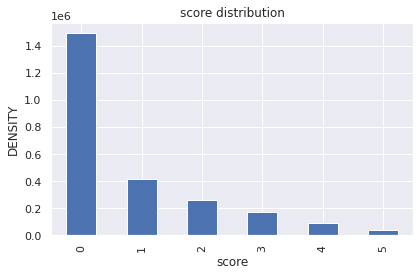

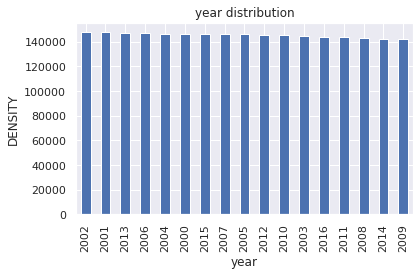

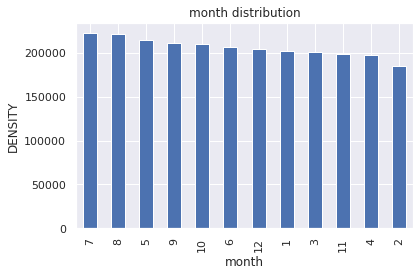

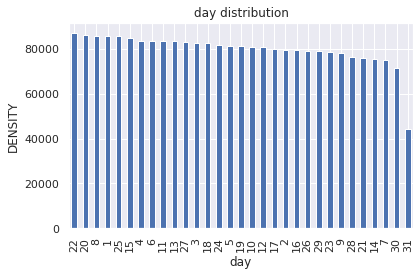

In [ ]:
#categorical variables
plt.figure(figsize=(10,40))
for col in categorical_columns:
    plt.figure()
    categorical_data[col].value_counts().plot(kind = 'bar')
    x_label = col
    y_label = 'DENSITY'
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title('{x_name} distribution'.format(x_name=x_label))
    plt.tight_layout()

# Bivariate analysis on categorical variables

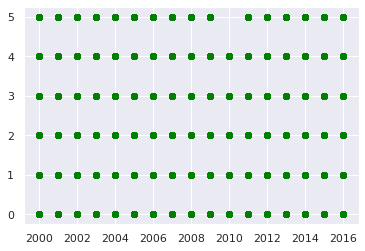

In [ ]:
plt.scatter(dataSet['year'], dataSet['score'], c ="green")
plt.show()

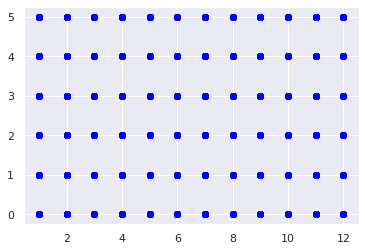

In [ ]:


plt.scatter(dataSet['month'], dataSet['score'], c ="blue")
plt.show()

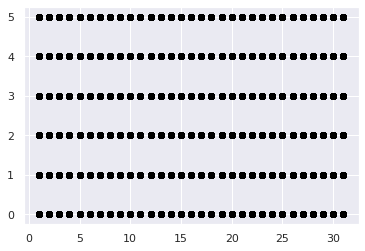

In [ ]:
plt.scatter(dataSet['day'], dataSet['score'], c ="black")
plt.show()

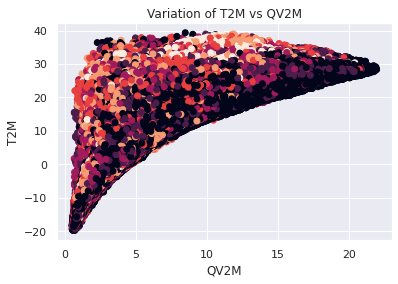

In [ ]:
plt.scatter(dataSet['QV2M'], dataSet['T2M'], c =dataSet['score'])
plt.xlabel('QV2M')
plt.ylabel('T2M')
plt.title('Variation of T2M vs QV2M')
plt.show()

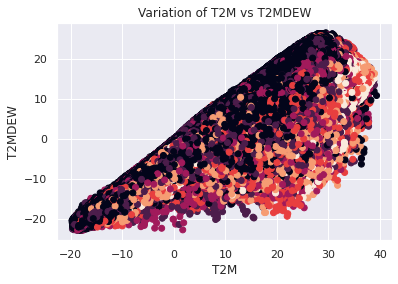

In [ ]:
plt.scatter(dataSet['T2M'], dataSet['T2MDEW'], c =dataSet['score'])
plt.xlabel('T2M')
plt.ylabel('T2MDEW')
plt.title('Variation of T2M vs T2MDEW')
plt.show()

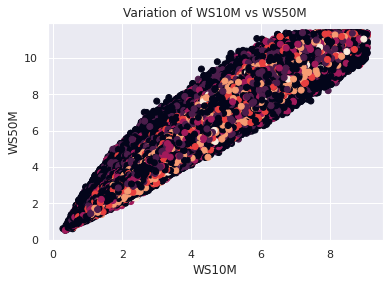

In [ ]:
temp_dataSet = dataSet[dataSet['score']==5]
plt.scatter(dataSet['WS10M'], dataSet['WS50M'], c= dataSet['score'])
plt.xlabel('WS10M')
plt.ylabel('WS50M')
plt.title('Variation of WS10M vs WS50M')
plt.show()

# To understand the correlations between features scatter plots were drawn to find out the attributes having strong correlation.

# In the above scatter plots we can observe that the independent variables have shown strong positive correlation.

# The pairs WS10M - WS50M have the one-to-one relationship.

# The features T2M – T2MDEW and QV2M - T2M relationship is not inear, although we can say that the overall they have strong correlation.

# Stripping target values from dataset

In [ ]:
features = dataSet.drop('score', 1)
features = features.drop('date', 1)
features = features.drop('fips', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
features

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,...,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,year,month,day
3,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,...,5.67,2.08,3.59,6.73,9.31,3.74,5.58,2000,1,4
10,1.33,100.40,6.63,11.48,7.84,7.84,18.88,5.72,13.16,10.43,...,2.48,1.05,1.43,3.55,6.38,1.71,4.67,2000,1,11
17,1.11,100.39,9.53,14.28,13.26,13.26,18.04,8.98,9.06,14.19,...,3.60,1.67,1.92,5.19,6.40,3.84,2.55,2000,1,18
24,0.00,100.11,2.05,-0.78,-7.93,-7.72,5.65,-5.46,11.11,-0.61,...,4.59,2.28,2.32,5.75,8.03,3.96,4.07,2000,1,25
31,0.00,101.00,3.36,2.06,-1.73,-1.70,11.02,-4.21,15.23,1.88,...,2.74,0.88,1.86,4.18,6.38,1.27,5.11,2000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19300647,0.04,82.47,2.19,-4.27,-9.36,-9.26,-1.51,-7.22,5.71,-4.38,...,10.27,3.08,7.18,9.42,12.59,5.62,6.97,2016,11,29
19300654,0.13,82.59,0.91,-11.96,-18.65,-17.90,-6.85,-15.24,8.39,-11.98,...,3.97,0.95,3.02,3.07,5.16,0.83,4.33,2016,12,6
19300661,0.02,82.86,1.40,-9.56,-14.18,-13.95,-2.69,-13.01,10.32,-10.95,...,6.59,1.28,5.31,5.33,8.35,2.13,6.22,2016,12,13
19300668,0.32,83.12,2.73,-2.55,-6.90,-6.84,2.66,-7.77,10.42,-3.94,...,8.43,3.44,4.99,8.99,10.14,6.67,3.47,2016,12,20


In [ ]:
target = dataSet['score']
target.head()

3     1
10    2
17    2
24    2
31    1
Name: score, dtype: int64

# Correlation between features

In [ ]:
correlation_plot = measures_df.corr()
correlation_plot.style.background_gradient(cmap = 'YlGnBu')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
PRECTOT,1.000000,0.068775,0.245081,0.093258,0.231035,0.230975,0.026773,0.144929,-0.304171,0.089598,0.049730,0.060981,0.023346,0.065755,0.069057,0.079508,0.057816,0.047477
PS,0.068775,1.000000,0.282412,0.164160,0.341234,0.341252,0.111979,0.208285,-0.225935,0.163830,-0.080747,-0.135905,0.022932,-0.198332,-0.043315,-0.091821,0.036238,-0.154479
QV2M,0.245081,0.282412,1.000000,0.870242,0.959385,0.960434,0.804338,0.906144,-0.071547,0.862559,-0.225449,-0.256452,-0.108789,-0.269203,-0.205971,-0.249961,-0.081554,-0.246203
T2M,0.093258,0.164160,0.870242,1.000000,0.913530,0.914218,0.983356,0.981629,0.244357,0.997515,-0.207874,-0.220192,-0.125407,-0.209030,-0.193196,-0.206444,-0.112579,-0.159589
T2MDEW,0.231035,0.341234,0.959385,0.913530,1.000000,0.999970,0.854716,0.939934,-0.015643,0.905184,-0.238299,-0.268686,-0.115920,-0.280702,-0.204238,-0.245323,-0.082416,-0.239335
T2MWET,0.230975,0.341252,0.960434,0.914218,0.999970,1.000000,0.855401,0.940629,-0.015500,0.905911,-0.237971,-0.268292,-0.115882,-0.280199,-0.204143,-0.245147,-0.082497,-0.239029
T2M_MAX,0.026773,0.111979,0.804338,0.983356,0.854716,0.855401,1.000000,0.937762,0.407534,0.980101,-0.216764,-0.221671,-0.141911,-0.199614,-0.195727,-0.196236,-0.133234,-0.126331
T2M_MIN,0.144929,0.208285,0.906144,0.981629,0.939934,0.940629,0.937762,1.000000,0.065037,0.979134,-0.206382,-0.225829,-0.112878,-0.225256,-0.197991,-0.225744,-0.096593,-0.200157
T2M_RANGE,-0.304171,-0.225935,-0.071547,0.244357,-0.015643,-0.015500,0.407534,0.065037,1.000000,0.241564,-0.080163,-0.043127,-0.110952,0.018746,-0.041778,0.029737,-0.128844,0.163320
TS,0.089598,0.163830,0.862559,0.997515,0.905184,0.905911,0.980101,0.979134,0.241564,1.000000,-0.189823,-0.202713,-0.110273,-0.196015,-0.180665,-0.193347,-0.102367,-0.152434


# Attributes T2M_MAX, T2M_MIN, T2MDEW, T2MWET, QV2M, T2M, and TS have shown strong positive correlation

# Likewise, WS10M, WS10M_MAX and WS10M_MIN have shown a strong positve correlation

# Similarly, WS50M, WS50M_MAX and WS50M_MIN show strong positive correlation

# But, from the scatter plots above, we see significant variance between the data points, despite the strong positive correlation. Hence,all the variables are retained, and other feature selection methods needs to be experimented.

# Splitting the dataset into training and testing data

In [ ]:
features.shape

(2474338, 21)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [ ]:
print("Shape of train features:")
x_train.shape

Shape of train features:


(1855753, 21)

In [ ]:
print("Shape of train targets:") 
y_train.shape

Shape of train targets:


(1855753,)

In [ ]:
print("Shape of test features:")
x_test.shape

Shape of test features:


(618585, 21)

In [ ]:
print("Shape of test target:")
y_test.shape

Shape of test target:


(618585,)

#Data Standardization

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Feature Selection

In [ ]:
Estimator = RandomForestClassifier(n_estimators=9) 
#using random forest as the estimator for recursive feature extractor

In [ ]:
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=15)
fitter = FeatureExtractor.fit(x_train, y_train)

In [ ]:
print("Number of Extracted Features: %s" % (fitter.n_features_))

Number of Extracted Features: 15


In [ ]:
print("Extracted Features: %s" % (fitter.support_))

Extracted Features: [False  True  True  True  True False  True  True  True  True  True False
 False  True  True  True False  True  True False  True]


In [ ]:
print("Ranking of Features: %s" % (fitter.ranking_))

Ranking of Features: [4 1 1 1 1 2 1 1 1 1 1 5 6 1 1 1 3 1 1 7 1]


In [ ]:
extracted_features = features.columns[(fitter.get_support())]

In [ ]:
print(extracted_features)

Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_RANGE', 'year',
       'day'],
      dtype='object')


In [ ]:
features = features.drop('PRECTOT', 1)
features = features.drop('T2MWET', 1)
features = features.drop('WS10M_MAX', 1)
features = features.drop('WS10M_MIN', 1)
features = features.drop('WS50M_MIN', 1)
features = features.drop('month', 1)
features.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipyker

,PS,QV2M,T2M,T2MDEW,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_RANGE,year,day
3,100.29,6.42,11.40,6.09,18.09,2.16,15.92,11.31,3.84,3.59,6.73,9.31,5.58,2000,4
10,100.40,6.63,11.48,7.84,18.88,5.72,13.16,10.43,1.76,1.43,3.55,6.38,4.67,2000,11
17,100.39,9.53,14.28,13.26,18.04,8.98,9.06,14.19,2.63,1.92,5.19,6.40,2.55,2000,18
24,100.11,2.05,-0.78,-7.93,5.65,-5.46,11.11,-0.61,3.35,2.32,5.75,8.03,4.07,2000,25
31,101.00,3.36,2.06,-1.73,11.02,-4.21,15.23,1.88,2.03,1.86,4.18,6.38,5.11,2000,1


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [ ]:
print("Train shape", x_train.shape)

Train shape (1855753, 15)


In [ ]:
print("Test shape", x_test.shape)

Test shape (618585, 15)


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#Class Imbalance

##Downsampling using Neighborhood Cleaning Rule

In [ ]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)

In [ ]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres == 5)))

Before UnderSampling, the shape of train_X: (1855753, 15)
Before UnderSampling, the shape of train_y: (1855753,) 

After UnderSampling, the shape of train_X: (1463261, 15)
After UnderSampling, the shape of train_y: (1463261,) 

Counts of label '0' - Before UnderSampling:1120668, After UnderSampling: 1042366
Counts of label '1' - Before UnderSampling:311912, After UnderSampling: 185167
Counts of label '2' - Before UnderSampling:196190, After UnderSampling: 104966
Counts of label '3' - Before UnderSampling:130330, After UnderSampling: 68121
Counts of label '4' - Before UnderSampling:69645, After UnderSampling: 35633
Counts of label '5' - Before UnderSampling:27008, After UnderSampling: 27008


##Downsampling using Near Miss

In [ ]:
downsampler = NearMiss()

In [ ]:
x_train_dres_nm, y_train_dres_nm = downsampler.fit_resample(x_train, y_train)

In [ ]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

Before UnderSampling, the shape of train_X: (1855753, 15)
Before UnderSampling, the shape of train_y: (1855753,) 

After UnderSampling, the shape of train_X: (162048, 15)
After UnderSampling, the shape of train_y: (162048,) 

Counts of label '0' - Before UnderSampling:1120668, After UnderSampling: 27008
Counts of label '1' - Before UnderSampling:311912, After UnderSampling: 27008
Counts of label '2' - Before UnderSampling:196190, After UnderSampling: 27008
Counts of label '3' - Before UnderSampling:130330, After UnderSampling: 27008
Counts of label '4' - Before UnderSampling:69645, After UnderSampling: 27008
Counts of label '5' - Before UnderSampling:27008, After UnderSampling: 27008


##Upsampling using SMOTE

In [ ]:
upsampler = SMOTE(random_state = 5)

In [ ]:
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [ ]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

Before OverSampling, the shape of train_X: (1855753, 15)
Before OverSampling, the shape of train_y: (1855753,) 

After OverSampling, the shape of train_X: (6724008, 15)
After OverSampling, the shape of train_y: (6724008,) 

Counts of label '0' - Before Oversampling:1120668, After OverSampling: 1120668
Counts of label '1' - Before Oversampling:311912, After OverSampling: 1120668
Counts of label '2' - Before Oversampling:196190, After OverSampling: 1120668
Counts of label '3' - Before Oversampling:130330, After OverSampling: 1120668
Counts of label '4' - Before Oversampling:69645, After OverSampling: 1120668
Counts of label '5' - Before Oversampling:27008, After OverSampling: 1120668


#**Dimentionality** **Reduction**

#**Linear Discriminant Analysis**




####**Linear** **Discriminant Analysis on UpSampled Data using SMOTE**

In [ ]:
LDanalysis = LDA(n_components=5)


In [ ]:
X_train_upsampled_LDA=LDanalysis.fit_transform(x_train_ures_SMOTE,y_train_ures_SMOTE)

In [ ]:
X_test_upsampled_LDA_transformed=LDanalysis.transform(x_test)

In [ ]:
print("Features shape of Train Data", x_train.shape)
print("Dimensionality reduced features shape using LDA on Upsampled data", X_train_upsampled_LDA.shape)
print("Dimensionality reduced features shape using LDA on testing data", X_test_upsampled_LDA_transformed.shape)

Features shape of Train Data (1855753, 15)
Dimensionality reduced features shape using LDA on Upsampled data (6724008, 5)
Dimensionality reduced features shape using LDA on testing data (618585, 5)


####**Linear Discriminant Analysis on Downsampled Data using Near Miss**

In [ ]:
LDanalysis = LDA(n_components=5)

In [ ]:
X_train_downsampled_nm_LDA=LDanalysis.fit_transform(x_train_dres_nm,y_train_dres_nm)

In [ ]:
X_test_downsampled_nm_LDA_transformed=LDanalysis.transform(x_test)

In [ ]:
print("Features shape of Train Data", x_train.shape)
print("Dimensionality reduced features shape using LDA on near miss downsampled data", X_train_downsampled_nm_LDA.shape)
print("Dimensionality reduced features shape using LDA on near miss downsampled testing data", X_test_downsampled_nm_LDA_transformed.shape)

Features shape of Train Data (1855753, 15)
Dimensionality reduced features shape using LDA on near miss downsampled data (162048, 5)
Dimensionality reduced features shape using LDA on near miss downsampled testing data (618585, 5)


#**Principal Component Analysis**

####**Principal Component Analysis on Upsampled Data using SMOTE**

In [ ]:
PCanalysis = PCA()

In [ ]:
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)


In [ ]:
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [4.01899034e-01 2.23835841e-01 1.09488764e-01 6.43391300e-02
 6.35268495e-02 6.01612451e-02 5.14755326e-02 1.16549413e-02
 8.24081632e-03 2.35591260e-03 1.53710859e-03 1.05811636e-03
 3.58535804e-04 6.81686198e-05 4.98536705e-09]


In [ ]:
PCanalysis = PCA(n_components=5)
# picking values with more than 90% variance


In [ ]:
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [0.40189903 0.22383584 0.10948876 0.06433913 0.06352685]


####**Principal Component Analysis on DownSampled Data**

In [ ]:
PCanalysis = PCA()

In [ ]:
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres_nm)


In [ ]:
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)

In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [4.01899034e-01 2.23835841e-01 1.09488764e-01 6.43391300e-02
 6.35268495e-02 6.01612451e-02 5.14755326e-02 1.16549413e-02
 8.24081632e-03 2.35591260e-03 1.53710859e-03 1.05811636e-03
 3.58535804e-04 6.81686198e-05 4.98536705e-09]


In [ ]:
PCanalysis = PCA(n_components = 5)
# picking values with more than 90% variance

In [ ]:
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres_nm)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [ ]:
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [0.40189903 0.22383584 0.10948876 0.06433913 0.06352685]


[Text(0.5, 1.0, ' data PCA projection')]

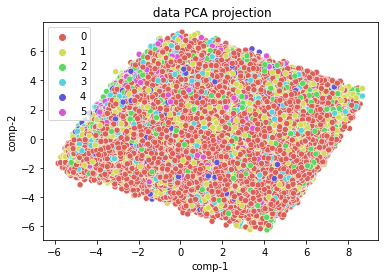

In [ ]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downlsampled_pca[:,0]
df["comp-2"] = x_train_downlsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 6),
                data=df).set(title=" data PCA projection") 

#Modeling

#**Decision Tree Algorithm**

##Decision Tree Algorithm with SMOTE Upsampled data

In [ ]:
dt_Classifier_up_smote = tree.DecisionTreeClassifier(criterion='gini', max_depth=70)
dt_Classifier_up_smote.fit(x_train_ures_SMOTE,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_Classifier_up_smote.predict(x_train_ures_SMOTE)
#testing prediction
y_prediction_up_smote = dt_Classifier_up_smote.predict(x_test)

In [ ]:
#Training F1 Score
print('f1 score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

f1 score: 0.992182690265751


In [ ]:
print('Analysis of Decision Tree Algorithm with Upsampling data with SMOTE:\n')
print(confusion_matrix(y_test, y_prediction_up_smote))
print(classification_report(y_test, y_prediction_up_smote))
print('Accuracy:',accuracy_score(y_test, y_prediction_up_smote))
print('Precision:',precision_score(y_test, y_prediction_up_smote, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_up_smote, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_up_smote, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_up_smote))

Analysis of Decision Tree Algorithm with Upsampling data with SMOTE:

[[326420  29898   9493   5081   2412    804]
 [ 23253  62600  12599   3375   1381    436]
 [  5508  12716  36910   8270   1871    447]
 [  2358   2611   8286  24495   4746    676]
 [   850    797   1400   4761  13347   1890]
 [   273    197    269    490   1909   5756]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    374108
           1       0.58      0.60      0.59    103644
           2       0.54      0.56      0.55     65722
           3       0.53      0.57      0.55     43172
           4       0.52      0.58      0.55     23045
           5       0.58      0.65      0.61      8894

    accuracy                           0.76    618585
   macro avg       0.61      0.64      0.62    618585
weighted avg       0.77      0.76      0.76    618585

Accuracy: 0.7590355407906755
Precision: 0.7680970157271267
Recall: 0.7590355407906755
F1 Score: 0.7630929296066223
C

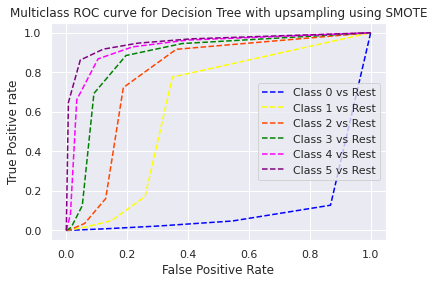

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_up_smote, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with upsampling using SMOTE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with upsampling using SMOTE',dpi=400)

  

In [ ]:
pickle.dump(dt_Classifier_up_smote, open('dt_Classifier_up_smote.pkl', 'wb'))

##Decision Tree Algorithm with PCA and SMOTE Upsampled data

In [ ]:
dt_classifier_smote_upsampling_pca = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_smote_upsampling_pca.fit(X_train_upsampled_pca,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_classifier_smote_upsampling_pca.predict(X_train_upsampled_pca)
#testing prediction
y_prediction_smote_upsampling_pca = dt_classifier_smote_upsampling_pca.predict(X_test_upsampled_transformed_pca)

In [ ]:
#Training F1 Score
print('F1 Score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

F1 Score: 0.992182690265751


In [ ]:
print('Analysis of Decision Tree Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(classification_report(y_test, y_prediction_smote_upsampling_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_smote_upsampling_pca))
print('Precision:',precision_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_smote_upsampling_pca))

Analysis of Decision Tree Algorithm with SMOTE Upsampling and PCA:

[[293700  37875  19161  12676   7467   3229]
 [ 23559  57063  13556   5432   2873   1161]
 [  7415  12507  33542   8595   2750    913]
 [  3718   3406   8171  21861   4986   1030]
 [  1616   1389   1847   4575  11817   1801]
 [   627    466    477    630   1790   4904]]
[[293700  37875  19161  12676   7467   3229]
 [ 23559  57063  13556   5432   2873   1161]
 [  7415  12507  33542   8595   2750    913]
 [  3718   3406   8171  21861   4986   1030]
 [  1616   1389   1847   4575  11817   1801]
 [   627    466    477    630   1790   4904]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.83    374108
           1       0.51      0.55      0.53    103644
           2       0.44      0.51      0.47     65722
           3       0.41      0.51      0.45     43172
           4       0.37      0.51      0.43     23045
           5       0.38      0.55      0.45      8894

    accura

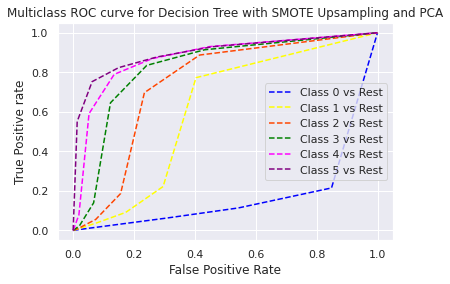

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_smote_upsampling_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and PCA',dpi=400)

In [ ]:
pickle.dump(dt_classifier_smote_upsampling_pca, open('dt_classifier_smote_upsampling_pca.pkl', 'wb'))

##Decision Tree Algorithm with LDA and SMOTE Upsampled Data

In [ ]:
dt_classifier_smote_upsampled_lda = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_smote_upsampled_lda.fit(X_train_upsampled_LDA,y_train_ures_SMOTE)
#training prediction
y_train_pred = dt_classifier_smote_upsampled_lda.predict(X_train_upsampled_LDA)
#testing prediction
y_pred_smote_upsampled_lda = dt_classifier_smote_upsampled_lda.predict(X_test_upsampled_LDA_transformed)

In [ ]:
#Training F1 Score
print('F1 Score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

F1 Score: 0.992182690265751


In [ ]:
print('Analysis of Decision Tree Algorithm with SMOTE Upsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(classification_report(y_test, y_pred_smote_upsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_pred_smote_upsampled_lda))
print('Precision:',precision_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_smote_upsampled_lda))

Analysis of Decision Tree Algorithm with SMOTE Upsampling and LDA:

[[252831  47871  30899  22154  13924   6429]
 [ 22766  49879  14569   8442   5505   2483]
 [  8252  12592  29378   9155   4333   2012]
 [  4363   4559   8157  18977   5384   1732]
 [  1910   2071   2412   4430  10221   2001]
 [   605    699    730    899   1723   4238]]
[[252831  47871  30899  22154  13924   6429]
 [ 22766  49879  14569   8442   5505   2483]
 [  8252  12592  29378   9155   4333   2012]
 [  4363   4559   8157  18977   5384   1732]
 [  1910   2071   2412   4430  10221   2001]
 [   605    699    730    899   1723   4238]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76    374108
           1       0.42      0.48      0.45    103644
           2       0.34      0.45      0.39     65722
           3       0.30      0.44      0.35     43172
           4       0.25      0.44      0.32     23045
           5       0.22      0.48      0.31      8894

    accura

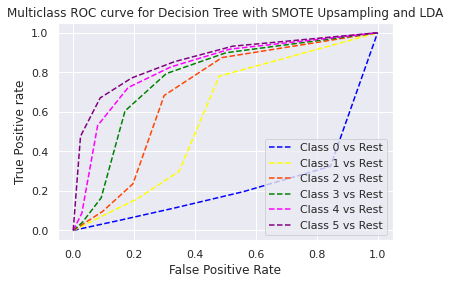

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_smote_upsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with SMOTE Upsampling and LDA',dpi=400)

In [ ]:
pickle.dump(y_pred_smote_upsampled_lda, open('y_pred_smote_upsampled_lda.pkl', 'wb'))

##Decision Tree Algorithm with Near Miss Downsampled Data - Hyperparameter Tuning

In [ ]:
params = {
          'max_depth': [3, 5, 10, 20],
          'min_samples_leaf': [10, 20, 50, 100],
          'max_features':['log2','sqrt',None]
}


In [ ]:
grid_search_dt_nm = GridSearchCV(estimator=dt_classifier_nm_downsampled, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search_dt_nm.fit(x_train_dres_nm,y_train_dres_nm)

Fitting 4 folds for each of 48 candidates, totalling 192 fits
CPU times: user 5.57 s, sys: 379 ms, total: 5.95 s
Wall time: 1min 4s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_DF = pd.DataFrame(grid_search_dt_nm.cv_results_)
score_DF.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
44,4.039066,0.086333,0.018964,0.000935,20,None,10,"{'max_depth': 20, 'max_features': None, 'min_s...",0.372013,0.410446,0.410076,0.392847,0.396346,0.015745,1
45,3.858481,0.057763,0.017518,0.000645,20,None,20,"{'max_depth': 20, 'max_features': None, 'min_s...",0.370409,0.407188,0.407237,0.385293,0.392532,0.015596,2
46,3.546394,0.064289,0.015615,0.000973,20,None,50,"{'max_depth': 20, 'max_features': None, 'min_s...",0.361967,0.393291,0.389391,0.371544,0.379048,0.012825,3
47,3.668899,0.163897,0.012275,0.001841,20,None,100,"{'max_depth': 20, 'max_features': None, 'min_s...",0.348860,0.377024,0.375938,0.350563,0.363096,0.013404,4
40,0.949544,0.024637,0.019776,0.001985,20,sqrt,10,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.332050,0.370804,0.367150,0.357055,0.356765,0.015132,5


##Decision Tree Algorithm with Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled.fit(x_train_dres_nm,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled.predict(x_train_dres_nm)
#testing prediction
y_prediction_nm_downsampled = dt_classifier_nm_downsampled.predict(x_test)

In [ ]:
#Training F1 Score
print('f1 score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

f1 score: 0.9435051935924665


In [ ]:
print('Analysis of Decision Tree Algorithm with Near Miss Downsampling data:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled))
print(classification_report(y_test, y_prediction_nm_downsampled))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled))

Analysis of Decision Tree Algorithm with Near Miss Downsampling data:

[[72764 70153 66318 67105 44092 53676]
 [11492 22629 19515 19553 13938 16517]
 [ 4632  8844 16242 14001  9895 12108]
 [ 2105  3796  6672 13400  7889  9310]
 [  695  1159  2058  4352  8499  6282]
 [  100   199   327   572  1716  5980]]
              precision    recall  f1-score   support

           0       0.79      0.19      0.31    374108
           1       0.21      0.22      0.22    103644
           2       0.15      0.25      0.18     65722
           3       0.11      0.31      0.17     43172
           4       0.10      0.37      0.16     23045
           5       0.06      0.67      0.11      8894

    accuracy                           0.23    618585
   macro avg       0.24      0.34      0.19    618585
weighted avg       0.54      0.23      0.26    618585

Accuracy: 0.22553731500117202
Precision: 0.5428369484662888
Recall: 0.22553731500117202
F1 Score: 0.2633270132063492
Cohen Kappa Score: 0.0793694253696

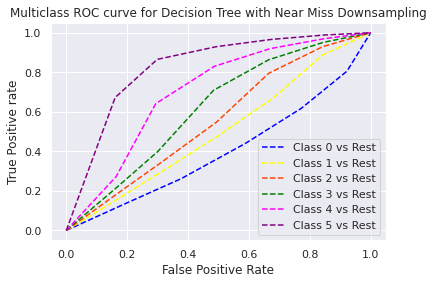

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling',dpi=400)

In [ ]:
pickle.dump(dt_classifier_nm_downsampled, open('dt_classifier_nm_downsampled.pkl', 'wb'))

##Decision Tree Algorithm with PCA and Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled_pca = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled_pca.fit(x_train_downlsampled_pca,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled_pca.predict(x_train_downlsampled_pca)
#testing prediction
y_prediction_nm_downsampled_pca = dt_classifier_nm_downsampled_pca.predict(x_test_downsampled_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

F1 Score: 0.9435051935924665


In [ ]:
print('Analysis of Decision Tree Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(classification_report(y_test, y_prediction_nm_downsampled_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_pca))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_pca))

Analysis of Decision Tree Algorithm with Near Miss Downsampling and PCA:

[[56004 53294 62311 63497 62636 76366]
 [10240 18126 17282 17563 17270 23163]
 [ 4901  7392 14112 12310 11278 15729]
 [ 2536  3612  6274 11566  8099 11085]
 [  967  1349  2140  4095  8140  6354]
 [  188   331   460   696  1783  5436]]
[[56004 53294 62311 63497 62636 76366]
 [10240 18126 17282 17563 17270 23163]
 [ 4901  7392 14112 12310 11278 15729]
 [ 2536  3612  6274 11566  8099 11085]
 [  967  1349  2140  4095  8140  6354]
 [  188   331   460   696  1783  5436]]
              precision    recall  f1-score   support

           0       0.75      0.15      0.25    374108
           1       0.22      0.17      0.19    103644
           2       0.14      0.21      0.17     65722
           3       0.11      0.27      0.15     43172
           4       0.07      0.35      0.12     23045
           5       0.04      0.61      0.07      8894

    accuracy                           0.18    618585
   macro avg       0.2

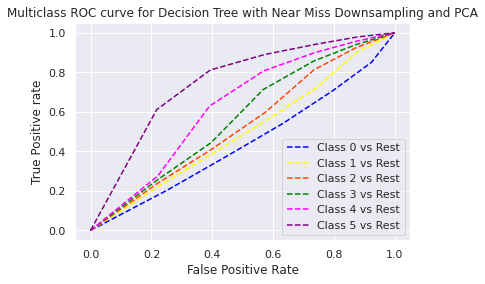

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and PCA',dpi=400)



In [ ]:
pickle.dump(dt_classifier_nm_downsampled_pca, open('dt_classifier_nm_downsampled_pca.pkl', 'wb'))

##Decision Tree Algorithm with LDA and Near Miss Downsampled Data

In [ ]:
dt_classifier_nm_downsampled_lda = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_nm_downsampled_lda.fit(X_train_downsampled_nm_LDA,y_train_dres_nm)
#training prediction
y_train_pred = dt_classifier_nm_downsampled_lda.predict(X_train_downsampled_nm_LDA)
#testing prediction
y_prediction_nm_downsampled_lda = dt_classifier_nm_downsampled_lda.predict(X_test_downsampled_nm_LDA_transformed)

In [ ]:
#training f1 score
print('F1 Score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

F1 Score: 0.9435051935924665


In [ ]:
print('Analysis of Decision Tree Algorithm with Near Miss Downsampling and LDA:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(classification_report(y_test, y_prediction_nm_downsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_lda))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_lda))

Analysis of Decision Tree Algorithm with Near Miss Downsampling and LDA:

[[69564 56919 58993 61399 59402 67831]
 [12602 17450 16047 17384 17953 22208]
 [ 5968  7558 12749 11330 12049 16068]
 [ 3023  3692  5893 10281  8383 11900]
 [ 1076  1491  2171  3859  7557  6891]
 [  266   392   513   850  1710  5163]]
[[69564 56919 58993 61399 59402 67831]
 [12602 17450 16047 17384 17953 22208]
 [ 5968  7558 12749 11330 12049 16068]
 [ 3023  3692  5893 10281  8383 11900]
 [ 1076  1491  2171  3859  7557  6891]
 [  266   392   513   850  1710  5163]]
              precision    recall  f1-score   support

           0       0.75      0.19      0.30    374108
           1       0.20      0.17      0.18    103644
           2       0.13      0.19      0.16     65722
           3       0.10      0.24      0.14     43172
           4       0.07      0.33      0.12     23045
           5       0.04      0.58      0.07      8894

    accuracy                           0.20    618585
   macro avg       0.2

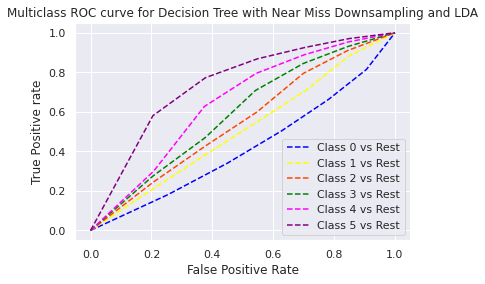

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree with Near Miss Downsampling and LDA',dpi=400)

In [ ]:
pickle.dump(dt_classifier_nm_downsampled_lda, open('dt_classifier_nm_downsampled_lda.pkl', 'wb'))

##Decision Tree Algorithm without resampling of Data

In [ ]:
dt_classifier_no_resampling = tree.DecisionTreeClassifier(criterion='gini')
dt_classifier_no_resampling.fit(x_train,y_train)
#training prediction
y_train_pred = dt_classifier_no_resampling.predict(x_train)
#testing prediction
y_prediction_dt_no_resampling = dt_classifier_no_resampling.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

F1 Score: 0.9721430832304462


In [ ]:
print('Analysis of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_prediction_dt_no_resampling))
print(classification_report(y_test, y_prediction_dt_no_resampling))
print('Accuracy:',accuracy_score(y_test, y_prediction_dt_no_resampling))
print('Precision:',precision_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_dt_no_resampling, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_dt_no_resampling))

Analysis of Decision Tree Algorithm without resampling:

[[333570  26422   8008   3856   1722    530]
 [ 27780  59711  11692   3051   1107    303]
 [  7941  13345  34825   7594   1599    418]
 [  3711   3160   8633  22761   4345    562]
 [  1523   1210   1781   4859  12018   1654]
 [   545    360    424    573   1872   5120]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    374108
           1       0.57      0.58      0.57    103644
           2       0.53      0.53      0.53     65722
           3       0.53      0.53      0.53     43172
           4       0.53      0.52      0.53     23045
           5       0.60      0.58      0.59      8894

    accuracy                           0.76    618585
   macro avg       0.61      0.60      0.61    618585
weighted avg       0.76      0.76      0.76    618585

Accuracy: 0.7565734700970764
Precision: 0.7560125038848691
Recall: 0.7565734700970764
F1 Score: 0.7562858532850028
Cohen Kappa Sc

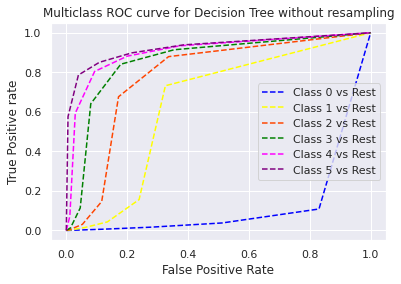

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_dt_no_resampling, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling',dpi=400)

##Decision Tree Algorithm without resampling of Data - Hyperparameter Tuning

In [ ]:
dt_classifier_no_resampling.get_depth()

49

In [ ]:
params = {
          'max_depth': [40, 50, 60, 70, 80],
          'max_features':['log2','sqrt',None]
}

In [ ]:
gridSearch = GridSearchCV(estimator=dt_classifier_no_resampling, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
gridSearch.fit(x_train,y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
CPU times: user 1min 46s, sys: 1.76 s, total: 1min 48s
Wall time: 12min 39s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['log2', 'sqrt', None]},
             scoring='accuracy', verbose=1)

In [ ]:
scoreDF = pd.DataFrame(gridSearch.cv_results_)
scoreDF.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
14,84.470025,4.049058,0.491682,0.025779,80,None,"{'max_depth': 80, 'max_features': None}",0.732570,0.732413,0.731542,0.732335,0.732215,0.000398,1
5,82.588269,5.840877,0.527653,0.022296,50,None,"{'max_depth': 50, 'max_features': None}",0.732305,0.732384,0.731783,0.732296,0.732192,0.000239,2
2,82.557348,7.058854,0.534885,0.014073,40,None,"{'max_depth': 40, 'max_features': None}",0.732469,0.732712,0.731337,0.732068,0.732146,0.000521,3
11,83.587469,5.285604,0.526330,0.016635,70,None,"{'max_depth': 70, 'max_features': None}",0.732441,0.732225,0.731404,0.732395,0.732116,0.000419,4
8,83.463750,5.469131,0.540987,0.007007,60,None,"{'max_depth': 60, 'max_features': None}",0.731857,0.732555,0.731197,0.732380,0.731997,0.000529,5


##Decision Tree Algorithm without resampling of Data - Setting the right hyperparameters

In [ ]:
dt_classifier_no_resampling = tree.DecisionTreeClassifier(criterion='gini', random_state=1,max_depth=70)
dt_classifier_no_resampling.fit(x_train,y_train)
#testing prediction
y_pred_dt_no_resampling_with_hyperparameters = dt_classifier_no_resampling.predict(x_test)

#training prediction
y_train_pred = dt_classifier_no_resampling.predict(x_train)


In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

F1 Score: 0.9721430832304462


In [ ]:
print('Analysis of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print(classification_report(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print('Accuracy:',accuracy_score(y_test, y_pred_dt_no_resampling_with_hyperparameters))
print('Precision:',precision_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_dt_no_resampling_with_hyperparameters, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_dt_no_resampling_with_hyperparameters))

Analysis of Decision Tree Algorithm without resampling - After Hyperparameter Tuning:

[[333589  26308   8084   3837   1728    562]
 [ 27885  59596  11712   3002   1111    338]
 [  7931  13272  34875   7599   1639    406]
 [  3727   3166   8595  22813   4292    579]
 [  1553   1189   1757   4779  12103   1664]
 [   531    380    435    575   1856   5117]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    374108
           1       0.57      0.58      0.57    103644
           2       0.53      0.53      0.53     65722
           3       0.54      0.53      0.53     43172
           4       0.53      0.53      0.53     23045
           5       0.59      0.58      0.58      8894

    accuracy                           0.76    618585
   macro avg       0.61      0.60      0.61    618585
weighted avg       0.76      0.76      0.76    618585

Accuracy: 0.7567157302553408
Precision: 0.7560835490530503
Recall: 0.7567157302553408
F1 Score: 0.7

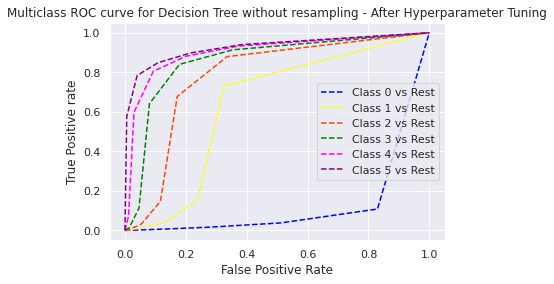

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_dt_no_resampling_with_hyperparameters, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Decision Tree without resampling - After Hyperparameter Tuning',dpi=400)

In [ ]:
pickle.dump(dt_classifier_no_resampling, open('dt_classifier_no_resampling.pkl', 'wb'))

#KNN Classifier

##KNN Algorithm without resampling

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(x_train, y_train)
y_train_pred = knn_classifier.predict(x_train)
y_pred_knn = knn_classifier.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

F1 Score: 0.8410920359253253


In [ ]:
print('Performance of KNN Algorithm without resampling:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling:

[[349333  18375   3618   1765    787    230]
 [ 36089  56026   8952   1795    606    176]
 [ 13155  13488  31706   6123   1018    232]
 [  6565   3437   8460  21033   3357    320]
 [  3096   1189   1839   4661  10895   1365]
 [   970    373    420    588   1767   4776]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89    374108
           1       0.60      0.54      0.57    103644
           2       0.58      0.48      0.53     65722
           3       0.58      0.49      0.53     43172
           4       0.59      0.47      0.53     23045
           5       0.67      0.54      0.60      8894

    accuracy                           0.77    618585
   macro avg       0.65      0.58      0.61    618585
weighted avg       0.75      0.77      0.76    618585

Accuracy: 0.7658915104633963
Precision: 0.7511131632987083
Recall: 0.7658915104633963
F1 Score: 0.7560206757044444
Cohen Kappa Score: 0.

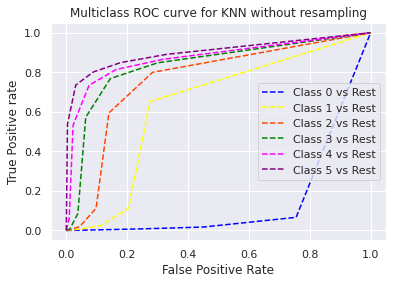

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling',dpi=300)

##KNN Algorithm without resampling - Hyperparameter Tuning

In [ ]:
k_range = list(range(1, 10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_classifier, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

##KNN Algorithm without resampling - Setting the right hyperparameters

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier.fit(x_train, y_train)
y_train_pred = knn_classifier.predict(x_train)
y_pred_knn = knn_classifier.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, y_train_pred, average='weighted'))

F1 Score: 0.9699723559432136


In [ ]:
pickle.dump(knn_classifier, open('knn_classifier.pkl', 'wb'))

In [ ]:
print('Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:\n')
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Performance of KNN Algorithm without resampling - After Hyperparameter Tuning:

[[343057  22741   4759   2249   1042    260]
 [ 22901  65452  12224   2174    697    196]
 [  5172  12426  38518   8120   1243    243]
 [  2462   2124   8205  25281   4652    448]
 [  1076    703   1267   4601  13524   1874]
 [   301    196    242    407   1859   5889]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92    374108
           1       0.63      0.63      0.63    103644
           2       0.59      0.59      0.59     65722
           3       0.59      0.59      0.59     43172
           4       0.59      0.59      0.59     23045
           5       0.66      0.66      0.66      8894

    accuracy                           0.79    618585
   macro avg       0.66      0.66      0.66    618585
weighted avg       0.79      0.79      0.79    618585

Accuracy: 0.7949125827493392
Precision: 0.794459202938359
Recall: 0.7949125827493392
F1 Score: 0.794683566

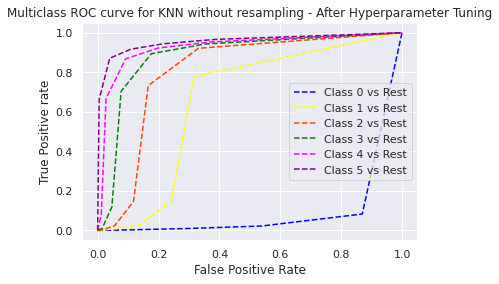

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN without resampling - After Hyperparameter Tuning',dpi=300)

##KNN Algorithm with SMOTE upsampling

In [ ]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(x_train_ures_SMOTE, y_train_ures_SMOTE)
y_train_pred = knn_classifier_SMOTE.predict(x_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(x_test)

In [ ]:
pickle.dump(knn_classifier_SMOTE, open('knn_classifier_SMOTE.pkl', 'wb'))

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, y_train_pred, average='weighted'))

training f1 score: 0.9904233392023277


In [ ]:
print('Performance of KNN Algorithm with SMOTE Upsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_SMOTE))
print(classification_report(y_test, y_pred_knn_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Performance of KNN Algorithm with SMOTE Upsampling:

[[336126  25919   6374   3377   1768    544]
 [ 19435  67257  13068   2576    980    328]
 [  3645  11948  39636   8663   1481    349]
 [  1532   1926   7940  26247   4959    568]
 [   574    569   1155   4591  14157   1999]
 [   146    151    196    374   1863   6164]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91    374108
           1       0.62      0.65      0.64    103644
           2       0.58      0.60      0.59     65722
           3       0.57      0.61      0.59     43172
           4       0.56      0.61      0.59     23045
           5       0.62      0.69      0.65      8894

    accuracy                           0.79    618585
   macro avg       0.65      0.68      0.66    618585
weighted avg       0.80      0.79      0.79    618585

Accuracy: 0.7914627739114268
Precision: 0.798353854975354
Recall: 0.7914627739114268
F1 Score: 0.7945692452820718
Cohen Kappa Score: 

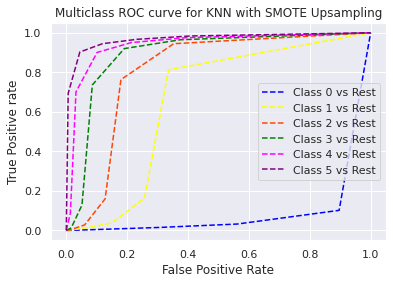

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn_SMOTE, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling',dpi=300)

##KNN Algorithm with Near Miss downsampling

In [ ]:
knn_classifier_NM = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_NM.fit(x_train_dres_nm, y_train_dres_nm)
y_pred_knn_NM = knn_classifier_NM.predict(x_test)
y_train_pred = knn_classifier_NM.predict(x_train_dres_nm)

In [ ]:
pickle.dump(knn_classifier_NM, open('knn_classifier_NM.pkl', 'wb'))

In [ ]:
print('f1 score:',f1_score(y_train_dres_nm, y_train_pred, average='weighted'))

f1 score: 0.9363795733060392


In [ ]:
print('Performance of KNN Algorithm with NM Downsampling:\n')
print(confusion_matrix(y_test, y_pred_knn_NM))
print(classification_report(y_test, y_pred_knn_NM))
print('Accuracy:',accuracy_score(y_test, y_pred_knn_NM))
print('Precision:',precision_score(y_test, y_pred_knn_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_NM))

Performance of KNN Algorithm with NM Downsampling:

[[71668 62300 65366 67700 51952 55122]
 [ 9594 22939 20082 18701 14619 17709]
 [ 3728  7199 17367 14776  9712 12940]
 [ 1827  2733  6282 14483  8249  9598]
 [  509   742  1592  4222  9491  6489]
 [   40    85   131   372  1587  6679]]
              precision    recall  f1-score   support

           0       0.82      0.19      0.31    374108
           1       0.24      0.22      0.23    103644
           2       0.16      0.26      0.20     65722
           3       0.12      0.34      0.18     43172
           4       0.10      0.41      0.16     23045
           5       0.06      0.75      0.11      8894

    accuracy                           0.23    618585
   macro avg       0.25      0.36      0.20    618585
weighted avg       0.57      0.23      0.27    618585

Accuracy: 0.2305697680997761
Precision: 0.5657879486742471
Recall: 0.2305697680997761
F1 Score: 0.2672196626781873
Cohen Kappa Score: 0.09233103759625705


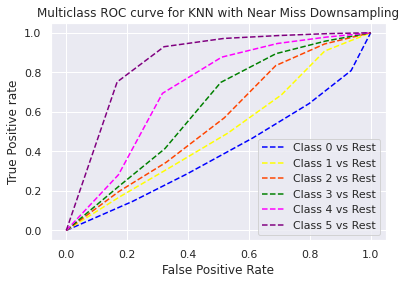

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_knn_NM, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling',dpi=300)

#KNN Algorithm with PCA and Near Miss Downsampled Data




In [ ]:
knn_classifier_nm_downsampled_pca = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_nm_downsampled_pca.fit(x_train_downlsampled_pca,y_train_dres_nm)
y_prediction_nm_downsampled_pca = knn_classifier_nm_downsampled_pca.predict(x_test_downsampled_transformed_pca)

In [ ]:
pickle.dump(knn_classifier_nm_downsampled_pca, open('knn_classifier_nm_downsampled_pca.pkl', 'wb'))

In [ ]:
print('Analysis of KNN Algorithm with Near Miss Downsampling and PCA:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_pca))
print(classification_report(y_test, y_prediction_nm_downsampled_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_pca))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_pca))

Analysis of KNN Algorithm with Near Miss Downsampling and PCA:

[[54671 51888 60011 63520 58366 85652]
 [ 8746 18718 17432 17453 15788 25507]
 [ 4002  6693 14820 12993 10244 16970]
 [ 1950  2966  6011 12533  7985 11727]
 [  728  1178  1863  3963  8670  6643]
 [  154   199   302   554  1573  6112]]
[[54671 51888 60011 63520 58366 85652]
 [ 8746 18718 17432 17453 15788 25507]
 [ 4002  6693 14820 12993 10244 16970]
 [ 1950  2966  6011 12533  7985 11727]
 [  728  1178  1863  3963  8670  6643]
 [  154   199   302   554  1573  6112]]
              precision    recall  f1-score   support

           0       0.78      0.15      0.25    374108
           1       0.23      0.18      0.20    103644
           2       0.15      0.23      0.18     65722
           3       0.11      0.29      0.16     43172
           4       0.08      0.38      0.14     23045
           5       0.04      0.69      0.08      8894

    accuracy                           0.19    618585
   macro avg       0.23      0.3

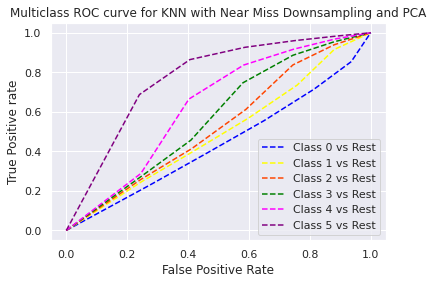

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling and PCA',dpi=400)

#KNN Algorithm with LDA and Near Miss Downsampled Data

In [ ]:
knn_classifier_nm_downsampled_lda = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_nm_downsampled_lda.fit(X_train_downsampled_nm_LDA,y_train_dres_nm)
y_prediction_nm_downsampled_lda = knn_classifier_nm_downsampled_lda.predict(X_test_downsampled_nm_LDA_transformed)

In [ ]:
pickle.dump(knn_classifier_nm_downsampled_lda, open('dt_classifier_nm_downsampled_lda.pkl', 'wb'))

In [ ]:
print('Analysis of KNN Algorithm with Near Miss Downsampling and LDA:\n')
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(confusion_matrix(y_test, y_prediction_nm_downsampled_lda))
print(classification_report(y_test, y_prediction_nm_downsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_prediction_nm_downsampled_lda))
print('Precision:',precision_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_nm_downsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_nm_downsampled_lda))

Analysis of KNN Algorithm with Near Miss Downsampling and LDA:

[[70566 55381 57087 61386 58933 70755]
 [12648 17382 15879 17118 17803 22814]
 [ 5840  7501 12702 11604 11419 16656]
 [ 2888  3517  5676 10699  8330 12062]
 [  966  1440  2001  3672  7961  7005]
 [  227   301   457   721  1617  5571]]
[[70566 55381 57087 61386 58933 70755]
 [12648 17382 15879 17118 17803 22814]
 [ 5840  7501 12702 11604 11419 16656]
 [ 2888  3517  5676 10699  8330 12062]
 [  966  1440  2001  3672  7961  7005]
 [  227   301   457   721  1617  5571]]
              precision    recall  f1-score   support

           0       0.76      0.19      0.30    374108
           1       0.20      0.17      0.18    103644
           2       0.14      0.19      0.16     65722
           3       0.10      0.25      0.14     43172
           4       0.08      0.35      0.12     23045
           5       0.04      0.63      0.08      8894

    accuracy                           0.20    618585
   macro avg       0.22      0.2

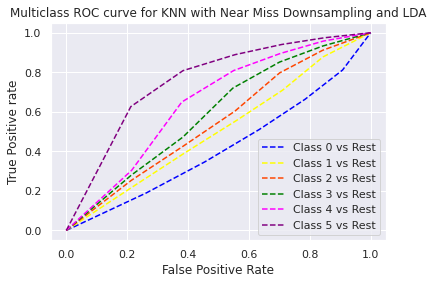

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_nm_downsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with Near Miss Downsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with Near Miss Downsampling and LDA',dpi=400)

#KNN Algorithm with LDA and SMOTE Upsampled Data

In [ ]:
knn_classifier_smote_upsampled_lda = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_smote_upsampled_lda.fit(X_train_upsampled_LDA,y_train_ures_SMOTE)
y_pred_smote_upsampled_lda = knn_classifier_smote_upsampled_lda.predict(X_test_upsampled_LDA_transformed)

In [ ]:
pickle.dump(y_pred_smote_upsampled_lda, open('y_pred_smote_upsampled_lda.pkl', 'wb'))

In [ ]:
print('Analysis of KNN Algorithm with SMOTE Upsampling and LDA:\n')
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(confusion_matrix(y_test, y_pred_smote_upsampled_lda))
print(classification_report(y_test, y_pred_smote_upsampled_lda))
print('Accuracy:',accuracy_score(y_test, y_pred_smote_upsampled_lda))
print('Precision:',precision_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_smote_upsampled_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_smote_upsampled_lda))

Analysis of KNN Algorithm with SMOTE Upsampling and LDA:

[[259812  46995  28608  20525  12580   5588]
 [ 22471  51371  14912   7742   4912   2236]
 [  8029  12189  30276   9258   4181   1789]
 [  4367   4388   7746  19644   5416   1611]
 [  1834   1996   2229   4331  10655   2000]
 [   637    615    667    858   1653   4464]]
[[259812  46995  28608  20525  12580   5588]
 [ 22471  51371  14912   7742   4912   2236]
 [  8029  12189  30276   9258   4181   1789]
 [  4367   4388   7746  19644   5416   1611]
 [  1834   1996   2229   4331  10655   2000]
 [   637    615    667    858   1653   4464]]
              precision    recall  f1-score   support

           0       0.87      0.69      0.77    374108
           1       0.44      0.50      0.46    103644
           2       0.36      0.46      0.40     65722
           3       0.32      0.46      0.37     43172
           4       0.27      0.46      0.34     23045
           5       0.25      0.50      0.34      8894

    accuracy        

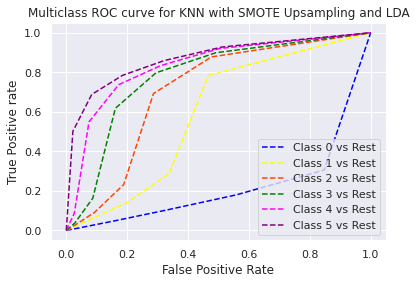

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_pred_smote_upsampled_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling and LDA',dpi=400)

#KNN Algorithm with PCA and SMOTE Upsampled Data

In [ ]:
knn_classifier_smote_upsampling_pca = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn_classifier_smote_upsampling_pca.fit(X_train_upsampled_pca,y_train_ures_SMOTE)
y_prediction_smote_upsampling_pca = knn_classifier_smote_upsampling_pca.predict(X_test_upsampled_transformed_pca)

In [ ]:
pickle.dump(knn_classifier_smote_upsampling_pca, open('knn_classifier_smote_upsampling_pca.pkl', 'wb'))

In [ ]:
print('Analysis of KNN Algorithm with SMOTE Upsampling and PCA:\n')
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(confusion_matrix(y_test, y_prediction_smote_upsampling_pca))
print(classification_report(y_test, y_prediction_smote_upsampling_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_smote_upsampling_pca))
print('Precision:',precision_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_smote_upsampling_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_smote_upsampling_pca))

Analysis of KNN Algorithm with SMOTE Upsampling and PCA:

[[302948  35805  16129  10440   6072   2714]
 [ 22443  59540  13615   4597   2517    932]
 [  6766  12022  34974   8770   2355    835]
 [  3553   3167   7757  22911   4924    860]
 [  1482   1217   1629   4277  12482   1958]
 [   531    389    415    525   1673   5361]]
[[302948  35805  16129  10440   6072   2714]
 [ 22443  59540  13615   4597   2517    932]
 [  6766  12022  34974   8770   2355    835]
 [  3553   3167   7757  22911   4924    860]
 [  1482   1217   1629   4277  12482   1958]
 [   531    389    415    525   1673   5361]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85    374108
           1       0.53      0.57      0.55    103644
           2       0.47      0.53      0.50     65722
           3       0.44      0.53      0.48     43172
           4       0.42      0.54      0.47     23045
           5       0.42      0.60      0.50      8894

    accuracy        

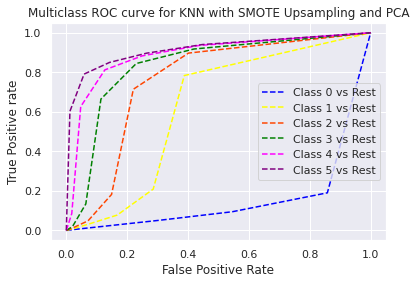

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_smote_upsampling_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for KNN with SMOTE Upsampling and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for KNN with SMOTE Upsampling and PCA',dpi=400)

#**Random Forest** **Algorithm** 

## Random Forest Algorithm with SMOTE Unsampled Data

In [ ]:
rf_classifer_ups_smote = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_ups_smote.fit(x_train_ures_SMOTE,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_ups_smote.predict(x_train_ures_SMOTE)
# prediction of test data
rf_ups_smote_y_prediction = rf_classifer_ups_smote.predict(x_test)

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

training f1 score: 0.992001228763187


In [ ]:
print('Results of Random Forest Algorithm with SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_ups_smote_y_prediction))
print(classification_report(y_test, rf_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_ups_smote_y_prediction))

Results of Random Forest Algorithm with SMOTE upsampled data:

[[345318  21621   4145   2023    794    207]
 [ 22676  66387  11692   2106    604    179]
 [  5145  11427  39667   8026   1239    218]
 [  2000   1732   7564  26862   4669    345]
 [   714    469    962   4526  14615   1759]
 [   228     99    162    301   1817   6287]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    374108
           1       0.65      0.64      0.65    103644
           2       0.62      0.60      0.61     65722
           3       0.61      0.62      0.62     43172
           4       0.62      0.63      0.62     23045
           5       0.70      0.71      0.70      8894

    accuracy                           0.81    618585
   macro avg       0.69      0.69      0.69    618585
weighted avg       0.81      0.81      0.81    618585

Accuracy: 0.8068996176758246
Precision: 0.8060437640151106
Recall: 0.8068996176758246
F1 Score: 0.8064414795924548
Cohen Ka

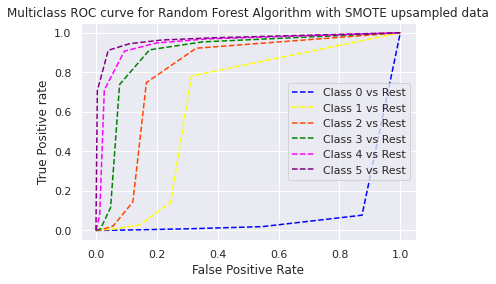

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_ups_smote_y_prediction, open('rf_classifer_upsampling_smote.pkl', 'wb'))

## Random Forest Algorithm with PCA and SMOTE upsampled data

In [ ]:
rf_classifer_ups_smote_ups_pca = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_ups_smote_ups_pca.fit(X_train_upsampled_pca,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_ups_smote_ups_pca.predict(X_train_upsampled_pca)
# prediction of test data
rf_pca_ups_smote_y_prediction = rf_classifer_ups_smote_ups_pca.predict(X_test_upsampled_transformed_pca)

In [ ]:
print('training f1 score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

training f1 score: 0.9918107314883648


In [ ]:
print('Results of Random Forest Algorithm with PCA and SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_pca_ups_smote_y_prediction))
print(classification_report(y_test, rf_pca_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_pca_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_pca_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_pca_ups_smote_y_prediction))

Results of Random Forest Algorithm with PCA and SMOTE upsampled data:

[[321381  28855  10857   7064   3997   1954]
 [ 24514  60170  12396   3915   1882    767]
 [  7636  11605  35432   8326   2074    649]
 [  3679   2699   7591  23628   4793    782]
 [  1548    948   1466   4353  12862   1868]
 [   533    307    310    543   1713   5488]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88    374108
           1       0.58      0.58      0.58    103644
           2       0.52      0.54      0.53     65722
           3       0.49      0.55      0.52     43172
           4       0.47      0.56      0.51     23045
           5       0.48      0.62      0.54      8894

    accuracy                           0.74    618585
   macro avg       0.57      0.62      0.59    618585
weighted avg       0.75      0.74      0.75    618585

Accuracy: 0.7419530056499916
Precision: 0.7515546796979696
Recall: 0.7419530056499916
F1 Score: 0.7461559531660309


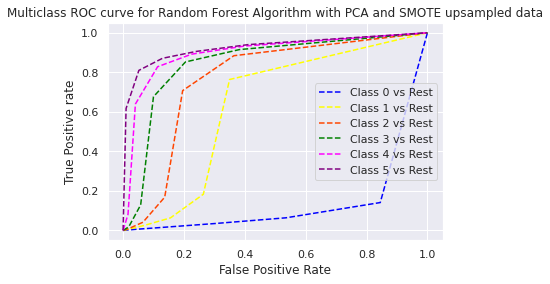

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_pca_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with PCA and SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with PCA and SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_pca_ups_smote_y_prediction, open('rf_classifer_smote_upsampling_pca.pkl', 'wb'))

## Random Forest Algorithm with LDA and SMOTE upsampled data

In [ ]:
rf_classifer_smote_ups_lda = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_smote_ups_lda.fit(X_train_upsampled_LDA,y_train_ures_SMOTE)
# prediction of train data
rf_ytrain_pred = rf_classifer_smote_ups_lda.predict(X_train_upsampled_LDA)
# prediction of test data
rf_lda_ups_smote_y_prediction = rf_classifer_smote_ups_lda.predict(X_test_upsampled_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_train_ures_SMOTE, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9916754256915947


In [ ]:
print('Results of Random Forest Algorithm with LDA and SMOTE upsampled data:\n')
print(confusion_matrix(y_test, rf_lda_ups_smote_y_prediction))
print(classification_report(y_test, rf_lda_ups_smote_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_lda_ups_smote_y_prediction))
print('Precision:',precision_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_lda_ups_smote_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_lda_ups_smote_y_prediction))

Results of Random Forest Algorithm with LDA and SMOTE upsampled data:

[[281369  41381  22495  14969   9271   4623]
 [ 25559  50916  13878   6869   4346   2076]
 [  9159  11836  29995   8989   3968   1775]
 [  4532   4090   7510  19808   5528   1704]
 [  1832   1846   2088   4224  10933   2122]
 [   574    525    583    798   1661   4753]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81    374108
           1       0.46      0.49      0.48    103644
           2       0.39      0.46      0.42     65722
           3       0.36      0.46      0.40     43172
           4       0.31      0.47      0.37     23045
           5       0.28      0.53      0.37      8894

    accuracy                           0.64    618585
   macro avg       0.44      0.53      0.47    618585
weighted avg       0.69      0.64      0.66    618585

Accuracy: 0.6430385476531115
Precision: 0.6858120648356018
Recall: 0.6430385476531115
F1 Score: 0.6597379572638886


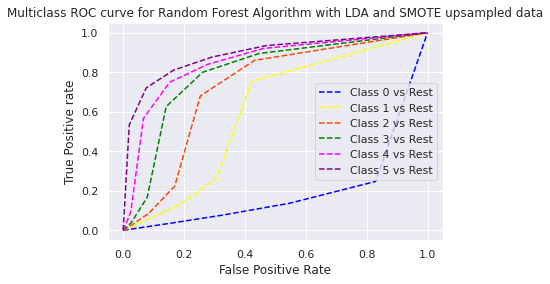

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_lda_ups_smote_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with LDA and SMOTE upsampled data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with LDA and SMOTE upsampled data',dpi=400)

In [ ]:
pickle.dump(rf_lda_ups_smote_y_prediction, open('rf_classifer_smote_upsampling_lda.pkl', 'wb'))

## Random Forest Algorithm with Near Miss Downsampled Data - Hyperparameter Tuning

In [ ]:
rf_max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
rf_max_depth.append(None)
rf_grid = {'n_estimators': [int(j) for j in np.linspace(start = 10, stop = 50, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': rf_max_depth,
               'bootstrap': [True,False]}

In [ ]:
rf_rand = RandomizedSearchCV(estimator = rf_classifer_nm_downsample, param_distributions = rf_grid, 
                               n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_rand.fit(x_train, y_train)

## Random Forest Algorithm with Near Miss Downsampled Data

In [ ]:
rf_classifer_nm_downsample = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_nm_downsample.fit(x_train_dres_nm,y_train_dres_nm)
# prediction of train data
rf_ytrain_pred = rf_classifer_nm_downsample.predict(x_train_dres_nm)
# prediction of test data
rf_nm_downsampled_y_prediction = rf_classifer_nm_downsample.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9428881486240317


In [ ]:
print('Results of Random Forest Algorithm with Near Miss Downsample Data:\n')
print(confusion_matrix(y_test, rf_nm_downsampled_y_prediction))
print(classification_report(y_test, rf_nm_downsampled_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_nm_downsampled_y_prediction))
print('Precision:',precision_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_nm_downsampled_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_nm_downsampled_y_prediction))

Results of Random Forest Algorithm with Near Miss Downsample Data:

[[87658 54059 55979 53490 44803 78119]
 [11746 19900 16963 15267 13273 26495]
 [ 4490  6222 14697 11961  8840 19512]
 [ 1953  2258  5237 12090  7059 14575]
 [  573   749  1374  3326  8318  8705]
 [   66    83   112   282  1293  7058]]
              precision    recall  f1-score   support

           0       0.82      0.23      0.36    374108
           1       0.24      0.19      0.21    103644
           2       0.16      0.22      0.18     65722
           3       0.13      0.28      0.17     43172
           4       0.10      0.36      0.16     23045
           5       0.05      0.79      0.09      8894

    accuracy                           0.24    618585
   macro avg       0.25      0.35      0.20    618585
weighted avg       0.57      0.24      0.29    618585

Accuracy: 0.2420378767671379
Precision: 0.5675524678513595
Recall: 0.2420378767671379
F1 Score: 0.2949472041170584
Cohen Kappa Score: 0.09510677266294798


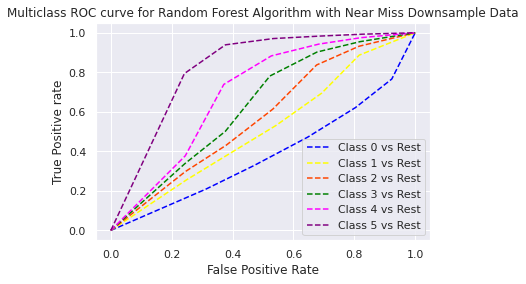

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_nm_downsampled_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with Near Miss Downsample Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with Near Miss Downsample Data',dpi=400)

In [ ]:
pickle.dump(rf_nm_downsampled_y_prediction, open('rf_classifer_nm_downsample.pkl', 'wb'))

## Random Forest Algorithm with PCA and Near Miss Downsampled Data

In [ ]:
rf_classifer_nm_downsample_pca = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_nm_downsample_pca.fit(x_train_downlsampled_pca,y_train_dres_nm)
# prediction of train data
rf_ytrain_pred = rf_classifer_nm_downsample_pca.predict(x_train_downlsampled_pca)
# prediction of test data
rf_nm_downsampled_pca_y_prediction = rf_classifer_nm_downsample_pca.predict(x_test_downsampled_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9427794456593737


In [ ]:
print('Results of Random Forest Algorithm with PCA and Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, rf_nm_downsampled_pca_y_prediction))
print(confusion_matrix(y_test, rf_nm_downsampled_pca_y_prediction))
print(classification_report(y_test, rf_nm_downsampled_pca_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_nm_downsampled_pca_y_prediction))
print('Precision:',precision_score(y_test, rf_nm_downsampled_pca_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_nm_downsampled_pca_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_nm_downsampled_pca_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_nm_downsampled_pca_y_prediction))

Results of Random Forest Algorithm with PCA and Near Miss Downsampled Data:

[[ 63132  47321  56223  54458  47649 105325]
 [ 10206  17097  15765  15323  13309  31944]
 [  4498   5843  13632  11283   8634  21832]
 [  2137   2494   5322  11331   6860  15028]
 [   840   1033   1644   3283   7876   8369]
 [   154    170    230    399   1449   6492]]
[[ 63132  47321  56223  54458  47649 105325]
 [ 10206  17097  15765  15323  13309  31944]
 [  4498   5843  13632  11283   8634  21832]
 [  2137   2494   5322  11331   6860  15028]
 [   840   1033   1644   3283   7876   8369]
 [   154    170    230    399   1449   6492]]
              precision    recall  f1-score   support

           0       0.78      0.17      0.28    374108
           1       0.23      0.16      0.19    103644
           2       0.15      0.21      0.17     65722
           3       0.12      0.26      0.16     43172
           4       0.09      0.34      0.14     23045
           5       0.03      0.73      0.07      8894

 

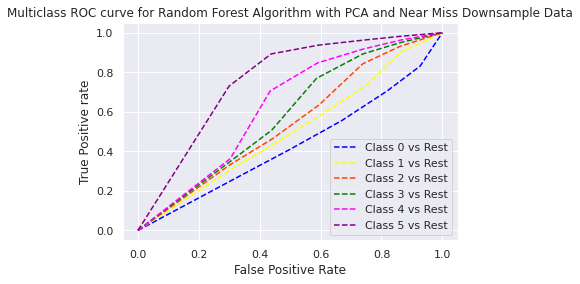

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_nm_downsampled_pca_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with PCA and Near Miss Downsample Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with PCA and Near Miss Downsample Data',dpi=400)

In [ ]:
pickle.dump(rf_nm_downsampled_pca_y_prediction, open('rf_classifer_nm_downsample_PCA.pkl', 'wb'))

## Random Forest Algorithm with LDA and Near Miss Downsampled Data

In [ ]:
rf_classifer_nm_downsample_lda = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_nm_downsample_lda.fit(X_train_downsampled_nm_LDA,y_train_dres_nm)
# prediction of train data
rf_ytrain_pred = rf_classifer_nm_downsample_lda.predict(X_train_downsampled_nm_LDA)
# prediction of test data
rf_nm_downsampled_lda_y_prediction = rf_classifer_nm_downsample_lda.predict(X_test_downsampled_nm_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_train_dres_nm, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9427794456593737


In [ ]:
print('Results of Random Forest Algorithm with LDA and Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, rf_nm_downsampled_lda_y_prediction))
print(confusion_matrix(y_test, rf_nm_downsampled_lda_y_prediction))
print(classification_report(y_test, rf_nm_downsampled_lda_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_nm_downsampled_lda_y_prediction))
print('Precision:',precision_score(y_test, rf_nm_downsampled_lda_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_nm_downsampled_lda_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_nm_downsampled_lda_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_nm_downsampled_lda_y_prediction))

Results of Random Forest Algorithm with LDA and Near Miss Downsampled Data:

[[93669 48481 48220 53238 49950 80550]
 [15500 15864 13774 14929 15908 27669]
 [ 6685  6499 11203 10156 10524 20655]
 [ 3209  2956  4547  9215  7624 15621]
 [ 1105  1083  1510  2978  7299  9070]
 [  247   226   347   517  1422  6135]]
[[93669 48481 48220 53238 49950 80550]
 [15500 15864 13774 14929 15908 27669]
 [ 6685  6499 11203 10156 10524 20655]
 [ 3209  2956  4547  9215  7624 15621]
 [ 1105  1083  1510  2978  7299  9070]
 [  247   226   347   517  1422  6135]]
              precision    recall  f1-score   support

           0       0.78      0.25      0.38    374108
           1       0.21      0.15      0.18    103644
           2       0.14      0.17      0.15     65722
           3       0.10      0.21      0.14     43172
           4       0.08      0.32      0.13     23045
           5       0.04      0.69      0.07      8894

    accuracy                           0.23    618585
   macro avg       

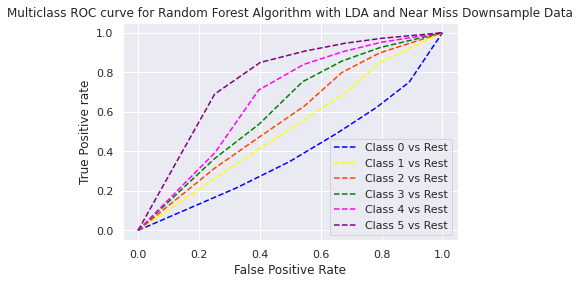

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_nm_downsampled_lda_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm with LDA and Near Miss Downsample Data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm with LDA and Near Miss Downsample Data',dpi=400)

In [ ]:
pickle.dump(rf_nm_downsampled_lda_y_prediction, open('rf_classifer_nm_downsample_LDA.pkl', 'wb'))

## Random Forest Algorithm without resampling 

In [ ]:
rf_classifer_no_resample = RandomForestClassifier(n_estimators = 20, max_depth=70, random_state=0)
rf_classifer_no_resample.fit(x_train,y_train)
# prediction of train data
rf_ytrain_pred = rf_classifer_no_resample.predict(x_train)
# prediction of test data
rf_no_resample_y_prediction = rf_classifer_no_resample.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_train, rf_ytrain_pred, average='weighted'))

F1 Score: 0.9712700678285888


In [ ]:
print('Results of Random Forest Algorithm without Resampling:\n')
print(confusion_matrix(y_test, rf_no_resample_y_prediction))
print(confusion_matrix(y_test, rf_no_resample_y_prediction))
print(classification_report(y_test, rf_no_resample_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_no_resample_y_prediction))
print('Precision:',precision_score(y_test, rf_no_resample_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_no_resample_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_no_resample_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_no_resample_y_prediction))

Results of Random Forest Algorithm without Resampling:

[[359989  11962   1429    560    142     26]
 [ 38637  55315   8226   1175    246     45]
 [ 14876  10682  33532   5960    616     56]
 [  7959   2135   7041  22617   3260    160]
 [  3609    891   1259   4215  11890   1181]
 [  1272    285    301    435   1548   5053]]
[[359989  11962   1429    560    142     26]
 [ 38637  55315   8226   1175    246     45]
 [ 14876  10682  33532   5960    616     56]
 [  7959   2135   7041  22617   3260    160]
 [  3609    891   1259   4215  11890   1181]
 [  1272    285    301    435   1548   5053]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90    374108
           1       0.68      0.53      0.60    103644
           2       0.65      0.51      0.57     65722
           3       0.65      0.52      0.58     43172
           4       0.67      0.52      0.58     23045
           5       0.77      0.57      0.66      8894

    accuracy          

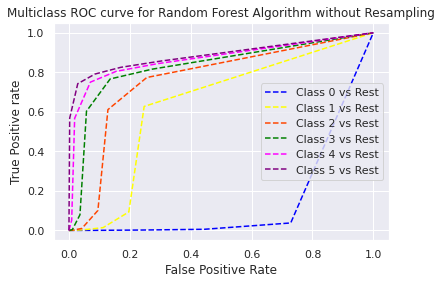

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_no_resample_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm without Resampling')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm without Resampling',dpi=400)

In [ ]:
pickle.dump(rf_no_resample_y_prediction, open('rf_classifer_no_resample.pkl', 'wb'))

## Random Forest Algorithm without resampling - Hyperparameter Tuning

In [ ]:
rf_max_depth = [int(j) for j in np.linspace(10, 110, num = 11)]
rf_max_depth.append(None)
rf_grid = {'n_estimators': [int(j) for j in np.linspace(start = 10, stop = 50, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': rf_max_depth,
               'bootstrap': [True,False]}

In [ ]:
rf_rand = RandomizedSearchCV(estimator = rf_classifer_no_resample, param_distributions = rf_grid, 
                               n_iter = 20, cv = 3, verbose=2, random_state=0, n_jobs = -1)
rf_rand.fit(x_train, y_train)

## Random Forest Algorithm without resampling - Right Hyperparameters Modification

In [ ]:
rf_classifer_no_resample_right_hyp = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
rf_classifer_no_resample_right_hyp.fit(x_train, y_train)
rf_ytrain_pred = rf_classifer_no_resample_right_hyp.predict(x_train)
rf_no_resample_right_hyp_y_prediction = rf_classifer_no_resample_right_hyp.predict(x_test)

In [ ]:
print('Results of Random Forest Algorithm without Resampling - Right Hyperparameters Modification:\n')
print(confusion_matrix(y_test, rf_no_resample_right_hyp_y_prediction))
print(confusion_matrix(y_test, rf_no_resample_right_hyp_y_prediction))
print(classification_report(y_test, rf_no_resample_right_hyp_y_prediction))
print('Accuracy:',accuracy_score(y_test, rf_no_resample_right_hyp_y_prediction))
print('Precision:',precision_score(y_test, rf_no_resample_right_hyp_y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, rf_no_resample_right_hyp_y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, rf_no_resample_right_hyp_y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, rf_no_resample_right_hyp_y_prediction))

Results of Random Forest Algorithm without Resampling - Right Hyperparameters Modification:

[[361634  10892   1048    391    121     22]
 [ 35858  58414   8117   1014    205     36]
 [ 12520  10835  35675   6040    596     56]
 [  6340   1596   7349  24409   3312    166]
 [  2920    486   1064   4528  12840   1207]
 [  1004    157    246    357   1710   5420]]
[[361634  10892   1048    391    121     22]
 [ 35858  58414   8117   1014    205     36]
 [ 12520  10835  35675   6040    596     56]
 [  6340   1596   7349  24409   3312    166]
 [  2920    486   1064   4528  12840   1207]
 [  1004    157    246    357   1710   5420]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    374108
           1       0.71      0.56      0.63    103644
           2       0.67      0.54      0.60     65722
           3       0.66      0.57      0.61     43172
           4       0.68      0.56      0.61     23045
           5       0.78      0.61      0

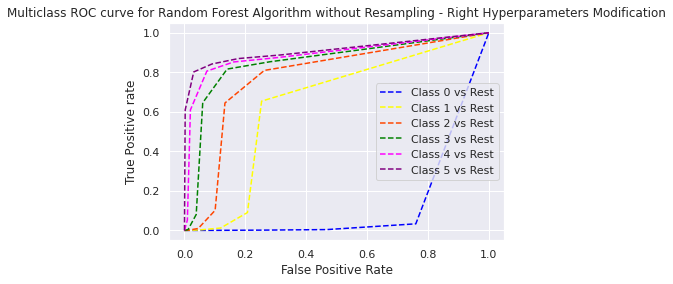

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, rf_no_resample_right_hyp_y_prediction, pos_label=i)
    
plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for Random Forest Algorithm without Resampling - Right Hyperparameters Modification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for Random Forest Algorithm without Resampling - Right Hyperparameters Modification',dpi=400)

In [ ]:
pickle.dump(rf_no_resample_right_hyp_y_prediction, open('rf_classifer_no_resample_right_hyperparameter.pkl', 'wb'))

#Logistic Regression -  The linear Model

##Logistic Regression with near miss downsampled data

In [ ]:
model = LogisticRegression(multi_class='multinomial')
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga' ]
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train_dres_nm, y_train_dres_nm)

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([48.30998542,  9.78168008, 19.79538256, 21.47282085, 43.37259089,
         9.63396209, 21.03631377, 30.21592099, 43.45727727, 12.80314128,
         6.88378795,  7.0569056 , 28.37444617,  9.77903158,  4.03185625,
         4.93554244, 14.63178037,  9.62421543,  3.02458994,  3.54606071]),
 'std_fit_time': array([5.5311327 , 1.19860822, 0.94137948, 0.24190868, 9.81519921,
        0.62919073, 1.89573491, 4.94485265, 7.49753553, 2.51729253,
        1.16819225, 0.92410238, 6.8305708 , 0.99438599, 0.31252987,
        0.3616639 , 2.83977748, 0.64698256, 0.21820711, 0.54686741]),
 'mean_score_time': array([0.01700764, 0.01551986, 0.01433617, 0.01430125, 0.01867002,
        0.01762797, 0.01333234, 0.02304368, 0.02400066, 0.02501159,
        0.01701088, 0.01432435, 0.02305168, 0.01511194, 0.01466455,
        0.0143796 , 0.01798023, 0.01495231, 0.01349355, 0.01605651]),
 'std_score_time': array([0.00459406, 0.0020542 , 0.00185651, 0.00116809, 0.00767697,
        0.00625   , 

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.283314 using {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.283220 (0.002655) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.282994 (0.002543) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.283208 (0.002643) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.283196 (0.002641) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.283200 (0.002683) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.282698 (0.002463) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.283200 (0.002673) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.283196 (0.002677) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.283312 (0.002681) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.282761 (0.002574) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.283314 (0.002689) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.283310 (0.002685) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.281840 (0.002154) with: {'C': 0.1, 'penalty': 'l2', 'solv

In [ ]:
y_prediction_lr_nm = grid_search.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm, average='weighted'))

F1 Score: 0.3648921384303501


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_nm))
print(confusion_matrix(y_test, y_prediction_lr_nm))
print(classification_report(y_test, y_prediction_lr_nm))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_nm))
print('Precision:',precision_score(y_test, y_prediction_lr_nm, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_nm, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_nm))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[158148  20268  20870  19300  60284  95238]
 [ 28543   8842   7059   6778  16708  35714]
 [ 13442   4579   4521   4738  10786  27656]
 [  7103   2632   2499   3151   6834  20953]
 [  3266   1664   1513   1605   3105  11892]
 [  1148    589    527    632   1023   4975]]
[[158148  20268  20870  19300  60284  95238]
 [ 28543   8842   7059   6778  16708  35714]
 [ 13442   4579   4521   4738  10786  27656]
 [  7103   2632   2499   3151   6834  20953]
 [  3266   1664   1513   1605   3105  11892]
 [  1148    589    527    632   1023   4975]]
              precision    recall  f1-score   support

           0       0.75      0.42      0.54    374108
           1       0.23      0.09      0.12    103644
           2       0.12      0.07      0.09     65722
           3       0.09      0.07      0.08     43172
           4       0.03      0.13      0.05     23045
           5       0.03      0.56      0.05      8894

  

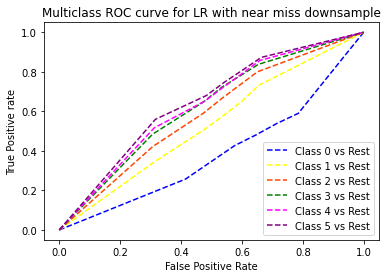

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_nm, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with near miss downsample')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with near miss downsample',dpi=300)

##Logistic Regression with near miss downsampled data and LDA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga' ]
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(X_train_downsampled_nm_LDA, y_train_dres_nm)


In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([6.99168119, 1.4536887 , 3.87843742, 2.37844701, 7.5801912 ,
        1.068342  , 3.57751791, 2.32618922, 6.60745476, 1.03769135,
        3.54859489, 2.89815426, 7.26391333, 1.06470691, 2.9920778 ,
        2.41233284, 7.35956914, 1.09448045, 2.39190176, 2.22243153]),
 'std_fit_time': array([5.98090143, 0.21990112, 0.3786393 , 0.21148309, 5.81491111,
        0.01806187, 0.30393393, 0.1827758 , 4.3440388 , 0.02541544,
        0.21053608, 0.73311835, 4.59951267, 0.02704213, 0.16803385,
        0.31121349, 4.93107597, 0.04483678, 0.70726038, 0.36403286]),
 'mean_score_time': array([0.01317526, 0.01946333, 0.01309123, 0.01254886, 0.01327295,
        0.01331045, 0.01265287, 0.01239211, 0.01272198, 0.01263955,
        0.01290162, 0.01549446, 0.01294885, 0.0124553 , 0.01269817,
        0.01286294, 0.0131755 , 0.01354022, 0.01440711, 0.01216729]),
 'std_score_time': array([0.00107946, 0.00776443, 0.00238494, 0.00123289, 0.00138489,
        0.00321056, 0.00237472, 0.000970

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.281594 using {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.281587 (0.001961) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.281586 (0.001971) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.281577 (0.001959) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.281594 (0.001951) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.281585 (0.001961) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.281585 (0.001969) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.281583 (0.001974) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.281581 (0.001959) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.281585 (0.001962) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.281583 (0.001971) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.281564 (0.001957) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.281575 (0.001960) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.281555 (0.001959) with: {'C': 0.1, 'penalty': 'l2', 'sol

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
y_prediction_lr_nm_LDA = grid_search.predict(X_test_downsampled_nm_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm_LDA, average='weighted'))

F1 Score: 0.36494813731201403


In [ ]:
print('Analysis of Logistic Regression Algorithm with LDA and Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_nm_LDA))
print(confusion_matrix(y_test, y_prediction_lr_nm_LDA))
print(classification_report(y_test, y_prediction_lr_nm_LDA))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_nm_LDA))
print('Precision:',precision_score(y_test, y_prediction_lr_nm_LDA, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_nm_LDA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm_LDA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_nm_LDA))

Analysis of Logistic Regression Algorithm with LDA and Near Miss Downsampled Data:

[[157002  22113  21729  20341  54910  98013]
 [ 27882   9025   7470   7378  15452  36437]
 [ 12756   4973   4708   5090  10234  27961]
 [  6471   2936   2800   3387   6429  21149]
 [  3037   1767   1647   1697   3036  11861]
 [  1070    622    602    673   1065   4862]]
[[157002  22113  21729  20341  54910  98013]
 [ 27882   9025   7470   7378  15452  36437]
 [ 12756   4973   4708   5090  10234  27961]
 [  6471   2936   2800   3387   6429  21149]
 [  3037   1767   1647   1697   3036  11861]
 [  1070    622    602    673   1065   4862]]
              precision    recall  f1-score   support

           0       0.75      0.42      0.54    374108
           1       0.22      0.09      0.12    103644
           2       0.12      0.07      0.09     65722
           3       0.09      0.08      0.08     43172
           4       0.03      0.13      0.05     23045
           5       0.02      0.55      0.05      

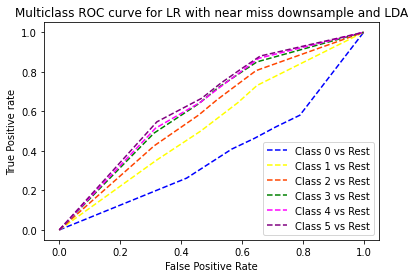

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_nm_LDA, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with near miss downsample and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with near miss downsample and LDA',dpi=300)

##Logistic Regression with near miss downsampled data and PCA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
solvers = ['newton-cg', 'lbfgs', 'sag', 'saga' ]
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train_downlsampled_pca, y_train_dres_nm)

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([7.22828857, 1.06579803, 3.51729579, 2.28356128, 6.17852648,
        1.04522112, 3.77069915, 2.29146372, 7.30773746, 1.05007113,
        3.36751361, 2.32096403, 5.44230405, 1.03966544, 2.84582163,
        2.16666867, 5.07645357, 1.04951153, 2.09821947, 2.04605495]),
 'std_fit_time': array([4.38822085, 0.06888431, 0.2823326 , 0.16700755, 3.56806825,
        0.04071181, 0.50978955, 0.17418627, 4.55264265, 0.03721422,
        0.26462696, 0.15845412, 2.51614092, 0.03732155, 0.1815576 ,
        0.15866407, 2.56986113, 0.03340477, 0.1744662 , 0.17613066]),
 'mean_score_time': array([0.01389888, 0.01240862, 0.01239047, 0.01190898, 0.01341667,
        0.01290552, 0.01175008, 0.01163996, 0.01310857, 0.01238688,
        0.01186819, 0.01283944, 0.01297471, 0.01258341, 0.01172215,
        0.0120323 , 0.01326009, 0.01265289, 0.01172199, 0.01118867]),
 'std_score_time': array([0.0012577 , 0.00043308, 0.00259925, 0.00069259, 0.00142749,
        0.00097409, 0.00039087, 0.000587

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.249523 using {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.249519 (0.001578) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.249504 (0.001566) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.249523 (0.001569) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.249522 (0.001581) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.249516 (0.001577) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.249502 (0.001568) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.249516 (0.001567) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.249507 (0.001562) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.249513 (0.001581) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.249500 (0.001574) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.249513 (0.001581) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.249506 (0.001557) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.249520 (0.001588) with: {'C': 0.1, 'penalty': 'l2', 'solv

In [ ]:
y_prediction_lr_nm_PCA = grid_search.predict(x_test_downsampled_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm_PCA, average='weighted'))

F1 Score: 0.3041458467400195


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_nm_PCA))
print(confusion_matrix(y_test, y_prediction_lr_nm_PCA))
print(classification_report(y_test, y_prediction_lr_nm_PCA))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_nm_PCA))
print('Precision:',precision_score(y_test, y_prediction_lr_nm_PCA, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_nm_PCA, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_nm_PCA, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_nm_PCA))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[124863  19009  14530  26770  65867 123069]
 [ 26855   7183   4179   7410  18718  39299]
 [ 13406   4241   2570   4829  12737  27939]
 [  7670   2655   1447   2966   8359  20075]
 [  3827   1760    889   1573   3352  11644]
 [  1414    747    371    557    762   5043]]
[[124863  19009  14530  26770  65867 123069]
 [ 26855   7183   4179   7410  18718  39299]
 [ 13406   4241   2570   4829  12737  27939]
 [  7670   2655   1447   2966   8359  20075]
 [  3827   1760    889   1573   3352  11644]
 [  1414    747    371    557    762   5043]]
              precision    recall  f1-score   support

           0       0.70      0.33      0.45    374108
           1       0.20      0.07      0.10    103644
           2       0.11      0.04      0.06     65722
           3       0.07      0.07      0.07     43172
           4       0.03      0.15      0.05     23045
           5       0.02      0.57      0.04      8894

  

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


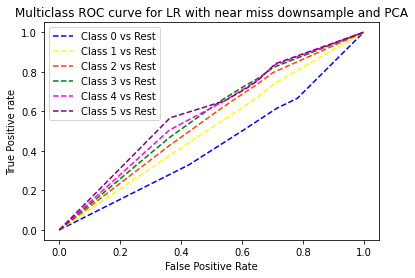

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_nm_PCA, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with near miss downsample and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with near miss downsample and PCA',dpi=300)

In [ ]:
filename = 'logregNearmissPCA.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##Logistic Regression with SMOTE upsampled data

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100, 1.0]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train_ures_SMOTE, y_train_ures_SMOTE)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([238.81908353, 194.48354912]),
 'std_fit_time': array([ 0.9210411 , 30.22940894]),
 'mean_score_time': array([1.0613846 , 0.87779101]),
 'std_score_time': array([0.00628827, 0.13991056]),
 'param_C': masked_array(data=[100, 1.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l2'}],
 'split0_test_score': array([0.24228376, 0.24273866]),
 'split1_test_score': array([0.24308862, 0.24426008]),
 'split2_test_score': array([0.24342236, 0.24367507]),
 'mean_test_score': array([0.24293158, 0.24355794]),
 'std_test_score': array([0.00047791, 0.00062662]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.243558 using {'C': 1.0, 'penalty': 'l2'}
0.242932 (0.000478) with: {'C': 100, 'penalty': 'l2'}
0.243558 (0.000627) with: {'C': 1.0, 'penalty': 'l2'}


In [ ]:
y_prediction_lr_SMOTE = grid_search.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))

F1 Score: 0.46542392047888925


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(classification_report(y_test, y_prediction_lr_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_SMOTE))
print('Precision:',precision_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_SMOTE))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[245587  23066  22155  32969  14248  36083]
 [ 45508   7784   6930  16719   7532  19171]
 [ 22528   4409   4591  13005   6376  14813]
 [ 11451   2397   2588  10438   4671  11627]
 [  5036   1141    960   4738   2839   8331]
 [  1578    534    248    933    737   4864]]
[[245587  23066  22155  32969  14248  36083]
 [ 45508   7784   6930  16719   7532  19171]
 [ 22528   4409   4591  13005   6376  14813]
 [ 11451   2397   2588  10438   4671  11627]
 [  5036   1141    960   4738   2839   8331]
 [  1578    534    248    933    737   4864]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70    374108
           1       0.20      0.08      0.11    103644
           2       0.12      0.07      0.09     65722
           3       0.13      0.24      0.17     43172
           4       0.08      0.12      0.10     23045
           5       0.05      0.55      0.09      8894

  

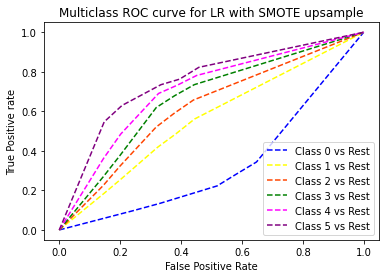

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_SMOTE, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with SMOTE upsample')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with SMOTE upsample',dpi=300)

In [ ]:
filename = 'logregSmote.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##Logistic Regression with SMOTE upsampled data and LDA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
c_values = [100, 1.0]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(X_train_upsampled_LDA, y_train_ures_SMOTE)

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([24.67071899, 20.13867871]),
 'std_fit_time': array([0.01243794, 3.17188933]),
 'mean_score_time': array([0.99536475, 0.81847978]),
 'std_score_time': array([0.00722774, 0.12000295]),
 'param_C': masked_array(data=[100, 1.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l2'}],
 'split0_test_score': array([0.24415293, 0.24415321]),
 'split1_test_score': array([0.24410498, 0.24410437]),
 'split2_test_score': array([0.24413326, 0.24413297]),
 'mean_test_score': array([0.24413039, 0.24413018]),
 'std_test_score': array([1.96804669e-05, 2.00340737e-05]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.244130 using {'C': 100, 'penalty': 'l2'}
0.244130 (0.000020) with: {'C': 100, 'penalty': 'l2'}
0.244130 (0.000020) with: {'C': 1.0, 'penalty': 'l2'}


In [ ]:
y_prediction_lr_SMOTE = grid_search.predict(X_test_upsampled_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))

F1 Score: 0.4588278972020629


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(classification_report(y_test, y_prediction_lr_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_SMOTE))
print('Precision:',precision_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_SMOTE))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[237008  26755  25291  33888  13565  37601]
 [ 43745   8226   7841  17132   7219  19481]
 [ 21549   4610   5147  13227   6261  14928]
 [ 10765   2683   2946  10444   4629  11705]
 [  4767   1225   1094   4824   2774   8361]
 [  1533    525    284    959    689   4904]]
[[237008  26755  25291  33888  13565  37601]
 [ 43745   8226   7841  17132   7219  19481]
 [ 21549   4610   5147  13227   6261  14928]
 [ 10765   2683   2946  10444   4629  11705]
 [  4767   1225   1094   4824   2774   8361]
 [  1533    525    284    959    689   4904]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68    374108
           1       0.19      0.08      0.11    103644
           2       0.12      0.08      0.10     65722
           3       0.13      0.24      0.17     43172
           4       0.08      0.12      0.10     23045
           5       0.05      0.55      0.09      8894

  

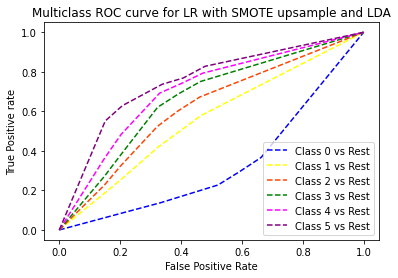

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_SMOTE, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with SMOTE upsample and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with SMOTE upsample and LDA',dpi=300)

In [ ]:
filename = 'logregSmoteLda.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##Logistic Regression with SMOTE upsampled data and PCA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100,1.0]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(X_train_upsampled_pca, y_train_ures_SMOTE)

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([36.60485744, 30.31044436]),
 'std_fit_time': array([1.06410641, 5.09272016]),
 'mean_score_time': array([1.02246205, 0.83015418]),
 'std_score_time': array([0.01332045, 0.13332401]),
 'param_C': masked_array(data=[100, 1.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l2'}],
 'split0_test_score': array([0.21209616, 0.21209685]),
 'split1_test_score': array([0.21277922, 0.21277922]),
 'split2_test_score': array([0.21219246, 0.21219246]),
 'mean_test_score': array([0.21235595, 0.21235618]),
 'std_test_score': array([0.00030187, 0.00030167]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.212356 using {'C': 1.0, 'penalty': 'l2'}
0.212356 (0.000302) with: {'C': 100, 'penalty': 'l2'}
0.212356 (0.000302) with: {'C': 1.0, 'penalty': 'l2'}


In [ ]:
y_prediction_lr_SMOTE = grid_search.predict(X_test_upsampled_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))

F1 Score: 0.3991418877716394


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(confusion_matrix(y_test, y_prediction_lr_SMOTE))
print(classification_report(y_test, y_prediction_lr_SMOTE))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_SMOTE))
print('Precision:',precision_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_SMOTE))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[198475  16283  18803  51302  16292  72953]
 [ 41856   4530   5014  20088   7918  24238]
 [ 22425   2595   3147  15112   6686  15757]
 [ 12286   1400   1779  11533   4690  11484]
 [  5717    865    728   5136   2609   7990]
 [  2045    445    213    953    602   4636]]
[[198475  16283  18803  51302  16292  72953]
 [ 41856   4530   5014  20088   7918  24238]
 [ 22425   2595   3147  15112   6686  15757]
 [ 12286   1400   1779  11533   4690  11484]
 [  5717    865    728   5136   2609   7990]
 [  2045    445    213    953    602   4636]]
              precision    recall  f1-score   support

           0       0.70      0.53      0.60    374108
           1       0.17      0.04      0.07    103644
           2       0.11      0.05      0.07     65722
           3       0.11      0.27      0.16     43172
           4       0.07      0.11      0.08     23045
           5       0.03      0.52      0.06      8894

  

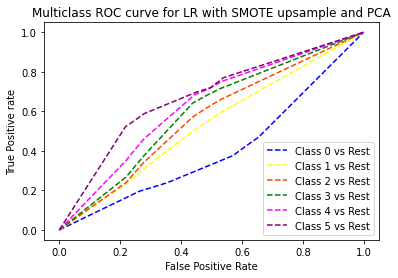

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_SMOTE, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with SMOTE upsample and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with SMOTE upsample and PCA',dpi=300)

In [ ]:
filename = 'logregSmotePCA.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##Logistic Regression with neighborhood cleaning rule downsampled data

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100,1.0, 0.01]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train_dres, y_train_dres)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([50.46369386, 50.40724373, 45.04800026]),
 'std_fit_time': array([0.58809397, 0.9725402 , 6.91695448]),
 'mean_score_time': array([0.21415226, 0.18337369, 0.13898309]),
 'std_score_time': array([0.02976687, 0.00261517, 0.02492324]),
 'param_C': masked_array(data=[100, 1.0, 0.01],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l2'},
  {'C': 1.0, 'penalty': 'l2'},
  {'C': 0.01, 'penalty': 'l2'}],
 'split0_test_score': array([0.17528495, 0.17473258, 0.17384171]),
 'split1_test_score': array([0.1725535 , 0.17228797, 0.17117787]),
 'split2_test_score': array([0.17299155, 0.17273546, 0.17183537]),
 'mean_test_score': array([0.17361   , 0.173252  , 0.17228498]),
 'std_test_score': array([0.00119779, 0.00106274, 0.00113303]),
 'rank_test_scor

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.173610 using {'C': 100, 'penalty': 'l2'}
0.173610 (0.001198) with: {'C': 100, 'penalty': 'l2'}
0.173252 (0.001063) with: {'C': 1.0, 'penalty': 'l2'}
0.172285 (0.001133) with: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
y_prediction_lr_ncr = grid_search.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr, average='weighted'))

F1 Score: 0.4659689854807232


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_ncr))
print(confusion_matrix(y_test, y_prediction_lr_ncr))
print(classification_report(y_test, y_prediction_lr_ncr))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_ncr))
print('Precision:',precision_score(y_test, y_prediction_lr_ncr, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_ncr, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_ncr))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[371236    216    290   1595      0    771]
 [101209    210    228   1337      0    660]
 [ 62908    272    270   1307      0    965]
 [ 40130    235    238   1392      0   1177]
 [ 21090    178    101    830      0    846]
 [  7832    134     38     85      0    805]]
[[371236    216    290   1595      0    771]
 [101209    210    228   1337      0    660]
 [ 62908    272    270   1307      0    965]
 [ 40130    235    238   1392      0   1177]
 [ 21090    178    101    830      0    846]
 [  7832    134     38     85      0    805]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.61      0.99      0.76    374108
           1       0.17      0.00      0.00    103644
           2       0.23      0.00      0.01     65722
           3       0.21      0.03      0.06     43172
           4       0.00      0.00      0.00     23045
           5       0.15      0.09      0.11      8894

    accuracy                           0.60    618585
   macro avg       0.23      0.19      0.16    618585
weighted avg       0.44      0.60      0.47    618585

Accuracy: 0.6044650290582539
Precision: 0.4414081237195363


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.6044650290582539
F1 Score: 0.4659689854807232
Cohen Kappa Score: 0.029804863220080913


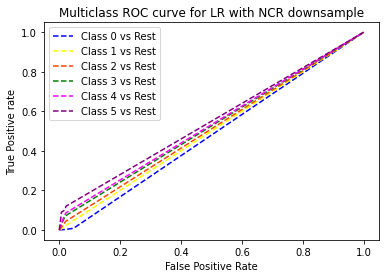

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_ncr, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with NCR downsample')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with NCR downsample',dpi=300)

In [ ]:
filename = 'logregNCR.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##PCA on neighborhood cleaning rule downsampled data

In [ ]:
PCanalysis = PCA()

In [ ]:
x_train_ncr_pca = PCanalysis.fit_transform(x_train_dres)
x_test_ncr_transformed_pca = PCanalysis.transform(x_test)
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [4.26763605e-01 2.25505793e-01 8.87189446e-02 6.86756963e-02
 6.80284617e-02 5.43105872e-02 4.32781650e-02 1.13631655e-02
 7.37144350e-03 2.75415006e-03 1.65164199e-03 1.17239279e-03
 3.36391324e-04 6.95558583e-05 6.73573894e-09]


In [ ]:
PCanalysis = PCA(n_components = 5)
# picking values with more than 90% variance
x_train_ncr_pca = PCanalysis.fit_transform(x_train_dres)
x_test_ncr_transformed_pca = PCanalysis.transform(x_test)
print("Variance Ratio: " ,PCanalysis.explained_variance_ratio_)

Variance Ratio:  [0.4267636  0.22550579 0.08871894 0.0686757  0.06802846]


##Logistic Regression with neighborhood cleaning rule downsampled data and PCA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100, 1]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train_ncr_pca, y_train_dres)

In [ ]:
y_prediction_lr_ncr_pca = grid_search.predict(x_test_ncr_transformed_pca)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr_pca, average='weighted'))

F1 Score: 0.4559166777564364


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_ncr_pca))
print(confusion_matrix(y_test, y_prediction_lr_ncr_pca))
print(classification_report(y_test, y_prediction_lr_ncr_pca))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_ncr_pca))
print('Precision:',precision_score(y_test, y_prediction_lr_ncr_pca, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_ncr_pca, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr_pca, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_ncr_pca))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[374071      0      0     31      0      6]
 [103618      0      0     21      0      5]
 [ 65704      0      0     18      0      0]
 [ 43149      0      0     22      0      1]
 [ 23035      0      0      7      0      3]
 [  8891      0      0      3      0      0]]
[[374071      0      0     31      0      6]
 [103618      0      0     21      0      5]
 [ 65704      0      0     18      0      0]
 [ 43149      0      0     22      0      1]
 [ 23035      0      0      7      0      3]
 [  8891      0      0      3      0      0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75    374108
           1       0.00      0.00      0.00    103644
           2       0.00      0.00      0.00     65722
           3       0.22      0.00      0.00     43172
           4       0.00      0.00      0.00     23045
           5       0.00      0.00      0.00      8894

    accuracy                           0.60    618585
   macro avg       0.14      0.17      0.13    618585
weighted avg       0.38      0.60      0.46    618585

Accuracy: 0.604756015745613
Precision: 0.3808452579694129


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.604756015745613
F1 Score: 0.4559166777564364
Cohen Kappa Score: 0.00019802404544955188


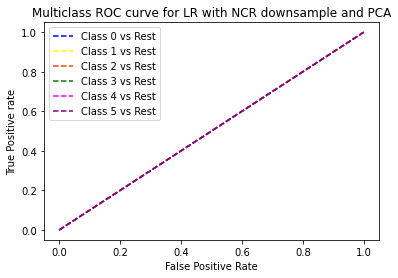

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_ncr_pca, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with NCR downsample and PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with NCR downsample and PCA',dpi=300)

In [ ]:
filename = 'logregNcrPCA.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##LDA dimensions reduction on Neighborhood cleaning rule downsample

In [ ]:
LDanalysis = LDA(n_components=5)
X_train_downsampled_ncr_LDA=LDanalysis.fit_transform(x_train_dres, y_train_dres)
X_test_downsampled_ncr_LDA_transformed=LDanalysis.transform(x_test)

##Logistic Regression with Neighborhood cleaning rule downsample data and LDA dimensions

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100, 1, 0.01]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(X_train_downsampled_ncr_LDA, y_train_dres)

In [ ]:
y_prediction_lr_ncr_lda = grid_search.predict(X_test_downsampled_ncr_LDA_transformed)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr_lda, average='weighted'))

F1 Score: 0.4663078108457239


In [ ]:
print('Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:\n')
print(confusion_matrix(y_test, y_prediction_lr_ncr_lda))
print(confusion_matrix(y_test, y_prediction_lr_ncr_lda))
print(classification_report(y_test, y_prediction_lr_ncr_lda))
print('Accuracy:',accuracy_score(y_test, y_prediction_lr_ncr_lda))
print('Precision:',precision_score(y_test, y_prediction_lr_ncr_lda, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction_lr_ncr_lda, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction_lr_ncr_lda, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction_lr_ncr_lda))

Analysis of Logistic Regression Algorithm with Near Miss Downsampled Data:

[[371088    301     95   1828      0    796]
 [101084    242     67   1575      0    676]
 [ 62831    282    105   1525      0    979]
 [ 40044    241     63   1622      0   1202]
 [ 21017    162     34    946      0    886]
 [  7796     89     16    110      0    883]]
[[371088    301     95   1828      0    796]
 [101084    242     67   1575      0    676]
 [ 62831    282    105   1525      0    979]
 [ 40044    241     63   1622      0   1202]
 [ 21017    162     34    946      0    886]
 [  7796     89     16    110      0    883]]
              precision    recall  f1-score   support

           0       0.61      0.99      0.76    374108
           1       0.18      0.00      0.00    103644
           2       0.28      0.00      0.00     65722
           3       0.21      0.04      0.06     43172
           4       0.00      0.00      0.00     23045
           5       0.16      0.10      0.12      8894

  

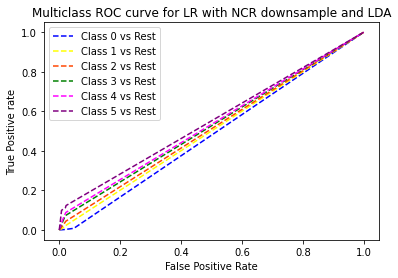

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction_lr_ncr_lda, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR with NCR downsample and LDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR with NCR downsample and LDA',dpi=300)

In [ ]:
filename = 'logregNcrLDA.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

##Logistic Regression with no resampling dataset

In [ ]:
model = LogisticRegression(multi_class='multinomial')
penalty = ['l2']
c_values = [100, 1]
# define grid search
grid = dict(penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', error_score=0)
grid_result = grid_search.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([62.9138538 , 50.84295122]),
 'std_fit_time': array([0.36890311, 7.95464533]),
 'mean_score_time': array([0.25443045, 0.19708832]),
 'std_score_time': array([0.00309575, 0.03664835]),
 'param_C': masked_array(data=[100, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 100, 'penalty': 'l2'}, {'C': 1, 'penalty': 'l2'}],
 'split0_test_score': array([0.15702455, 0.15670883]),
 'split1_test_score': array([0.15541651, 0.15615911]),
 'split2_test_score': array([0.15646499, 0.15679463]),
 'mean_test_score': array([0.15630202, 0.15655419]),
 'std_test_score': array([0.00066652, 0.00028155]),
 'rank_test_score': array([2, 1], dtype=int32)}

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.156554 using {'C': 1, 'penalty': 'l2'}
0.156302 (0.000667) with: {'C': 100, 'penalty': 'l2'}
0.156554 (0.000282) with: {'C': 1, 'penalty': 'l2'}


In [ ]:
y_prediction = grid_search.predict(x_test)

In [ ]:
print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

F1 Score: 0.47598131547795103


In [ ]:
print('Analysis of Logistic Regression Algorithm with No Resmpled Data:\n')
print(confusion_matrix(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))
print('Accuracy:',accuracy_score(y_test, y_prediction))
print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_prediction))

Analysis of Logistic Regression Algorithm with No Resmpled Data:

[[367736   1810   1689   2764     54     55]
 [ 98664   1301   1500   2044     49     86]
 [ 60246   1421   1524   2300     85    146]
 [ 37655   1411   1393   2394    122    197]
 [ 19462   1144    746   1524     58    111]
 [  7054    813    472    377     56    122]]
[[367736   1810   1689   2764     54     55]
 [ 98664   1301   1500   2044     49     86]
 [ 60246   1421   1524   2300     85    146]
 [ 37655   1411   1393   2394    122    197]
 [ 19462   1144    746   1524     58    111]
 [  7054    813    472    377     56    122]]
              precision    recall  f1-score   support

           0       0.62      0.98      0.76    374108
           1       0.16      0.01      0.02    103644
           2       0.21      0.02      0.04     65722
           3       0.21      0.06      0.09     43172
           4       0.14      0.00      0.00     23045
           5       0.17      0.01      0.03      8894

    accuracy

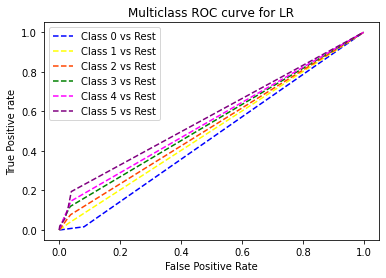

In [ ]:
falsePositiveRate = dict()
truePositiveRate = dict()
threshold = dict()

for i in range(6):    
    falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')
plt.plot(falsePositiveRate[2], truePositiveRate[2], linestyle='--',color='orangered', label='Class 2 vs Rest')
plt.plot(falsePositiveRate[3], truePositiveRate[3], linestyle='--',color='green', label='Class 3 vs Rest')
plt.plot(falsePositiveRate[4], truePositiveRate[4], linestyle='--',color='magenta', label='Class 4 vs Rest')
plt.plot(falsePositiveRate[5], truePositiveRate[5], linestyle='--',color='purple', label='Class 5 vs Rest')

plt.title('Multiclass ROC curve for LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC curve for LR',dpi=300)

In [ ]:
filename = 'logreg.pkl'
pickle.dump(grid_search.best_estimator_, open(filename, 'wb'))

# Logistic Regression training f1 scores

In [ ]:
#near miss
pickled_model = pickle.load(open('/content/logregNearmiss.pkl', 'rb'))
y_pre = pickled_model.predict(x_train_dres_nm)
print('training F1 Score on near miss:',f1_score(y_train_dres_nm, y_pre, average='weighted'))

training F1 Score on near miss: 0.28448500553729816


In [ ]:
#near miss lda
pickled_model = pickle.load(open('/content/logregNearmissLDA.pkl', 'rb'))
y_pre = pickled_model.predict(X_train_downsampled_nm_LDA)
print('training F1 Score on near miss and lda:',f1_score(y_train_dres_nm, y_pre, average='weighted'))

training F1 Score on near miss and lda: 0.2815727229506452


In [ ]:
#near miss pca
pickled_model = pickle.load(open('/content/logregNearmissPCA.pkl', 'rb'))
y_pre = pickled_model.predict(x_train_downlsampled_pca)
print('training F1 Score on near miss and pca:',f1_score(y_train_dres_nm, y_pre, average='weighted'))

training F1 Score on near miss and pca: 0.24965689794178764


In [ ]:
#ncr
pickled_model = pickle.load(open('/content/logregNCR.pkl', 'rb'))
y_pre = pickled_model.predict(x_train_dres)
print('training F1 Score on ncr:',f1_score(y_train_dres, y_pre, average='weighted'))

training F1 Score on ncr: 0.6004448798529084


In [ ]:
#ncr lda
pickled_model = pickle.load(open('/content/logregNearmissPCA.pkl', 'rb'))
y_pre = pickled_model.predict(X_train_downsampled_ncr_LDA)
print('training F1 Score on ncr and lda:',f1_score(y_train_dres, y_pre, average='weighted'))

training F1 Score on ncr and lda: 0.3136706160280928


In [ ]:
#ncr pca
pickled_model = pickle.load(open('/content/logregNcrPCA.pkl', 'rb'))
y_pre = pickled_model.predict(x_train_ncr_pca)
print('training F1 Score on ncr and pca:',f1_score(y_train_dres, y_pre, average='weighted'))

training F1 Score on ncr and pca: 0.5927323314677658


In [ ]:
# upsample
model = LogisticRegression(multi_class='multinomial').fit(x_train_ures_SMOTE, y_train_ures_SMOTE)
y_pre = model.predict(x_train_ures_SMOTE)


In [ ]:
print('training F1 Score on smote:',f1_score(y_train_ures_SMOTE, y_pre, average='weighted'))

training F1 Score on smote: 0.24286431806982828


In [ ]:
filename = 'logregSMOTE.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# upsample lda
model = LogisticRegression(multi_class='multinomial').fit(X_train_upsampled_LDA, y_train_ures_SMOTE)
y_pre = model.predict(X_train_upsampled_LDA)
print('training F1 Score on smote and lda:',f1_score(y_train_ures_SMOTE, y_pre, average='weighted'))

training F1 Score on smote and lda: 0.2441490501501845


In [ ]:
filename = 'logregSMOTELDA.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#upsample pca
model = LogisticRegression(multi_class='multinomial').fit(X_train_upsampled_pca, y_train_ures_SMOTE)
y_pre = model.predict(X_train_upsampled_pca)
print('training F1 Score on smote and pca:',f1_score(y_train_ures_SMOTE, y_pre, average='weighted'))

training F1 Score on smote and pca: 0.21236483048319504


In [ ]:
filename = 'logregSMOTEPCA.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#no resample
pickled_model = pickle.load(open('/content/logreg.pkl', 'rb'))
y_pre = pickled_model.predict(x_train)
print('training F1 Score on no resample data:',f1_score(y_train, y_pre, average='weighted'))

training F1 Score on no resample data: 0.47505344519199133
